A notebook for modeling of radio SEDs -- focus: SSA

In [2]:
%reload_ext autoreload 
%autoreload 2 

# load functions
import functions

# imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from scipy.optimize import curve_fit
import matplotlib.lines as mlines

In [91]:
# input flux density values

# from ALMA
phase_ALMA = np.array([4.1, 7.1, 17.1, 21.0, 198.6, 213.5, 306.2, 1024.4, 1364.4, 4.1, 6.2, 17.1, 198.6, 1364.4, 1217, 1217]) # days
freq_ALMA = np.array([100.0, 100.0, 100.0, 93.5, 100.0, 92.1, 103.0, 92.1, 100.0, 250.0, 250.0, 250.0, 250.0, 250.0, 6.5, 6.3]) # GHz
flux_ALMA = np.array([4.25, 7.42, 9.05, 7.41, 0.336, 0.322, 0.264, 1.128, 0.955, 4.21, 4.32, 2.49, 0.120, 0.286, 9.1, 8.7]) # mJy
flux_err_ALMA = np.array([0.22, 0.38, 0.46, 0.99, 0.026, 0.036, 0.044, 0.069, 0.093, 0.43, 0.44, 0.28, 0.022, 0.067, 0.9, 1.3]) # mJy
telescope_ALMA = np.array(['ALMA']*len(phase_ALMA))

# 1300 days
freq_1300 = np.array([10.0, 15.1, 22.0, 33.0]) # GHz
flux_1300 = np.array([7.023, 6.476, 7.055, 4.48]) # mJy
flux_err_1300 = np.array([0.944, 0.818, 0.673, 0.15]) # mJy
phase_1300 = np.array([1300]*len(freq_1300)) # days
telescope_1300 = np.array(['VLA']*len(phase_1300))

# 1700 days
freq_1700 = np.array([6.0, 10.0, 15.1, 22.0, 33.0]) # GHz
flux_1700 = np.array([6.069, 5.882, 4.85, 3.485, 3.072]) # mJy
flux_err_1700 = np.array([1.18, 0.577, 0.053, 0.468, 0.177]) # mJy
phase_1700 = np.array([1700]*len(freq_1700)) # days
telescope_1700 = np.array(['VLA']*len(phase_1700))

# 2100 days
freq_2100 = np.array([3.0, 6.0, 10.0, 15.1, 22.0]) # GHz
flux_2100 = np.array([6.22, 12.228, 7.593, 8.68, 8.33]) # mJy
flux_err_2100 = np.array([1.66, 0.56, 0.593, 0.10, 0.23]) # mJy
phase_2100 = np.array([2100]*len(freq_2100)) # days
telescope_2100 = np.array(['VLA']*len(phase_2100))

# 2400 days
freq_2400 = np.array([3.0, 6.0, 10.0, 15.1, 20.0, 24.0]) # GHz
flux_2400 = np.array([16.2, 15.07, 13.309, 9.432, 4.973, 2.19]) # mJy
flux_err_2400 = np.array([0.95, 0.27, 0.059, 0.07, 0.099, 0.14]) # mJy
phase_2400 = np.array([2400]*len(freq_2400)) # days
telescope_2400 = np.array(['VLA']*len(phase_2400))

# 2500 days
freq_2500 = np.array([3.0, 6.0, 10.0]) # GHz
flux_2500 = np.array([17.77, 15.755, 13.097]) # mJy
flux_err_2500 = np.array([0.6, 0.052, 0.040]) # mJy
phase_2500 = np.array([2500]*len(freq_2500)) # days
telescope_2500 = np.array(['VLA']*len(phase_2500))

In [92]:
# stack all data into one table
phase = np.concatenate((phase_ALMA, phase_1300, phase_1700, phase_2100, phase_2400, phase_2500))
freq = np.concatenate((freq_ALMA, freq_1300, freq_1700, freq_2100, freq_2400, freq_2500))
flux = np.concatenate((flux_ALMA, flux_1300, flux_1700, flux_2100, flux_2400, flux_2500))
flux_err = np.concatenate((flux_err_ALMA, flux_err_1300, flux_err_1700, flux_err_2100, flux_err_2400, flux_err_2500))
telescope = np.concatenate((telescope_ALMA, telescope_1300, telescope_1700, telescope_2100, telescope_2400, telescope_2500))

table = np.column_stack((phase, freq, flux, flux_err))
data = Table(table, names=['phase', 'freq', 'flux', 'flux_err'])
data['phase'] = data['phase'].astype(float)
data['freq'] = data['freq'].astype(float)
data['flux'] = data['flux'].astype(float)
data['flux_err'] = data['flux_err'].astype(float)
data['telescope'] = telescope

In [93]:
# set global values for x and y axes of plots:
x_sed = (0.8*np.min(data['freq'][telescope=='VLA']), 1.2*np.max(data['freq'][telescope=='VLA']))
x_lc = (0.8*np.min(data['phase'][telescope=='VLA']), 1.2*np.max(data['phase'][telescope=='VLA']))

# Plot each epoch and model, manually:
1) Play around with single component
2) Play around with 2 components, where applicable

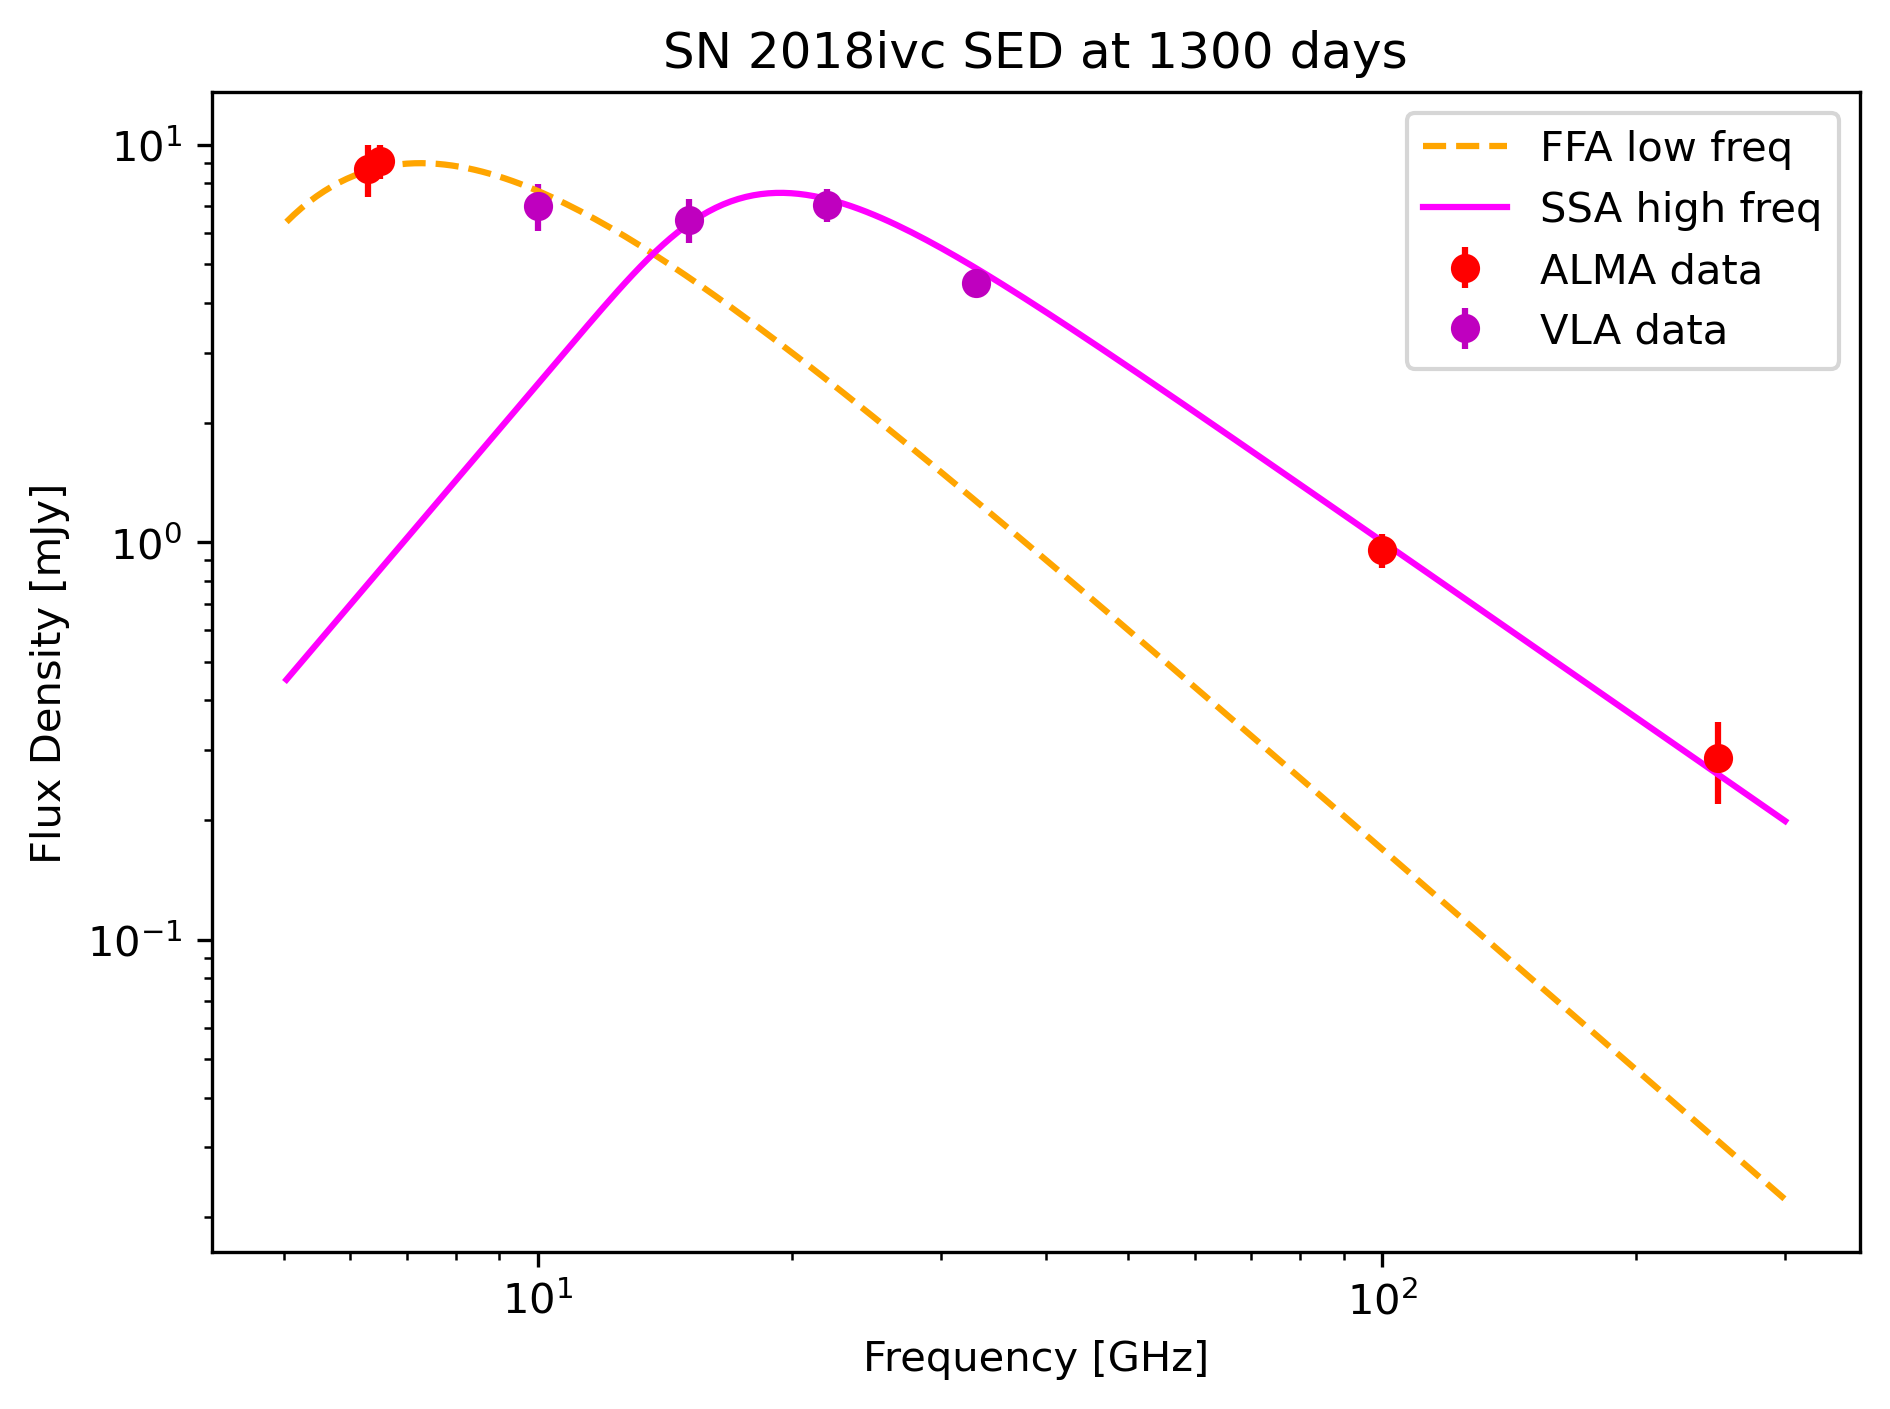

In [100]:
# 1300 day epoch
plt.figure(dpi=300)
mask = ((data['phase'] > 1200) & (data['phase'] < 1400))
data_1300 = data[mask]

# color code by telescope
ALMA_mask = (data_1300['telescope'] == 'ALMA')
VLA_mask = (data_1300['telescope'] == 'VLA')

x_ALMA = data_1300['freq'][ALMA_mask]
y_ALMA = data_1300['flux'][ALMA_mask]
yerr_ALMA = data_1300['flux_err'][ALMA_mask]

x_VLA = data_1300['freq'][VLA_mask]
y_VLA = data_1300['flux'][VLA_mask]
yerr_VLA = data_1300['flux_err'][VLA_mask]

plt.errorbar(x_ALMA, y_ALMA, yerr=yerr_ALMA, fmt='o', color='r', label='ALMA data')
plt.errorbar(x_VLA, y_VLA, yerr=yerr_VLA, fmt='o', color='m', label='VLA data')

# fit the F_SSA model by eye with 2 components
fmin_early = data_1300['freq'].min() * 0.8
fmax_early = data_1300['freq'].max() * 1.2
freq_range = np.logspace(np.log10(fmin_early), np.log10(fmax_early), 200)
F_by_eye_low = functions.F_FFA(freq_range, 12.0, 0.45, 1.85)
F_by_eye_high = functions.F_SSA(freq_range, 2.5, 12.0, 3.95)

plt.plot(freq_range, F_by_eye_low, label='FFA low freq', color='orange', linestyle='--')
plt.plot(freq_range, F_by_eye_high, label='SSA high freq', color='magenta')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED at 1300 days')
plt.legend()
plt.tight_layout()
plt.show()

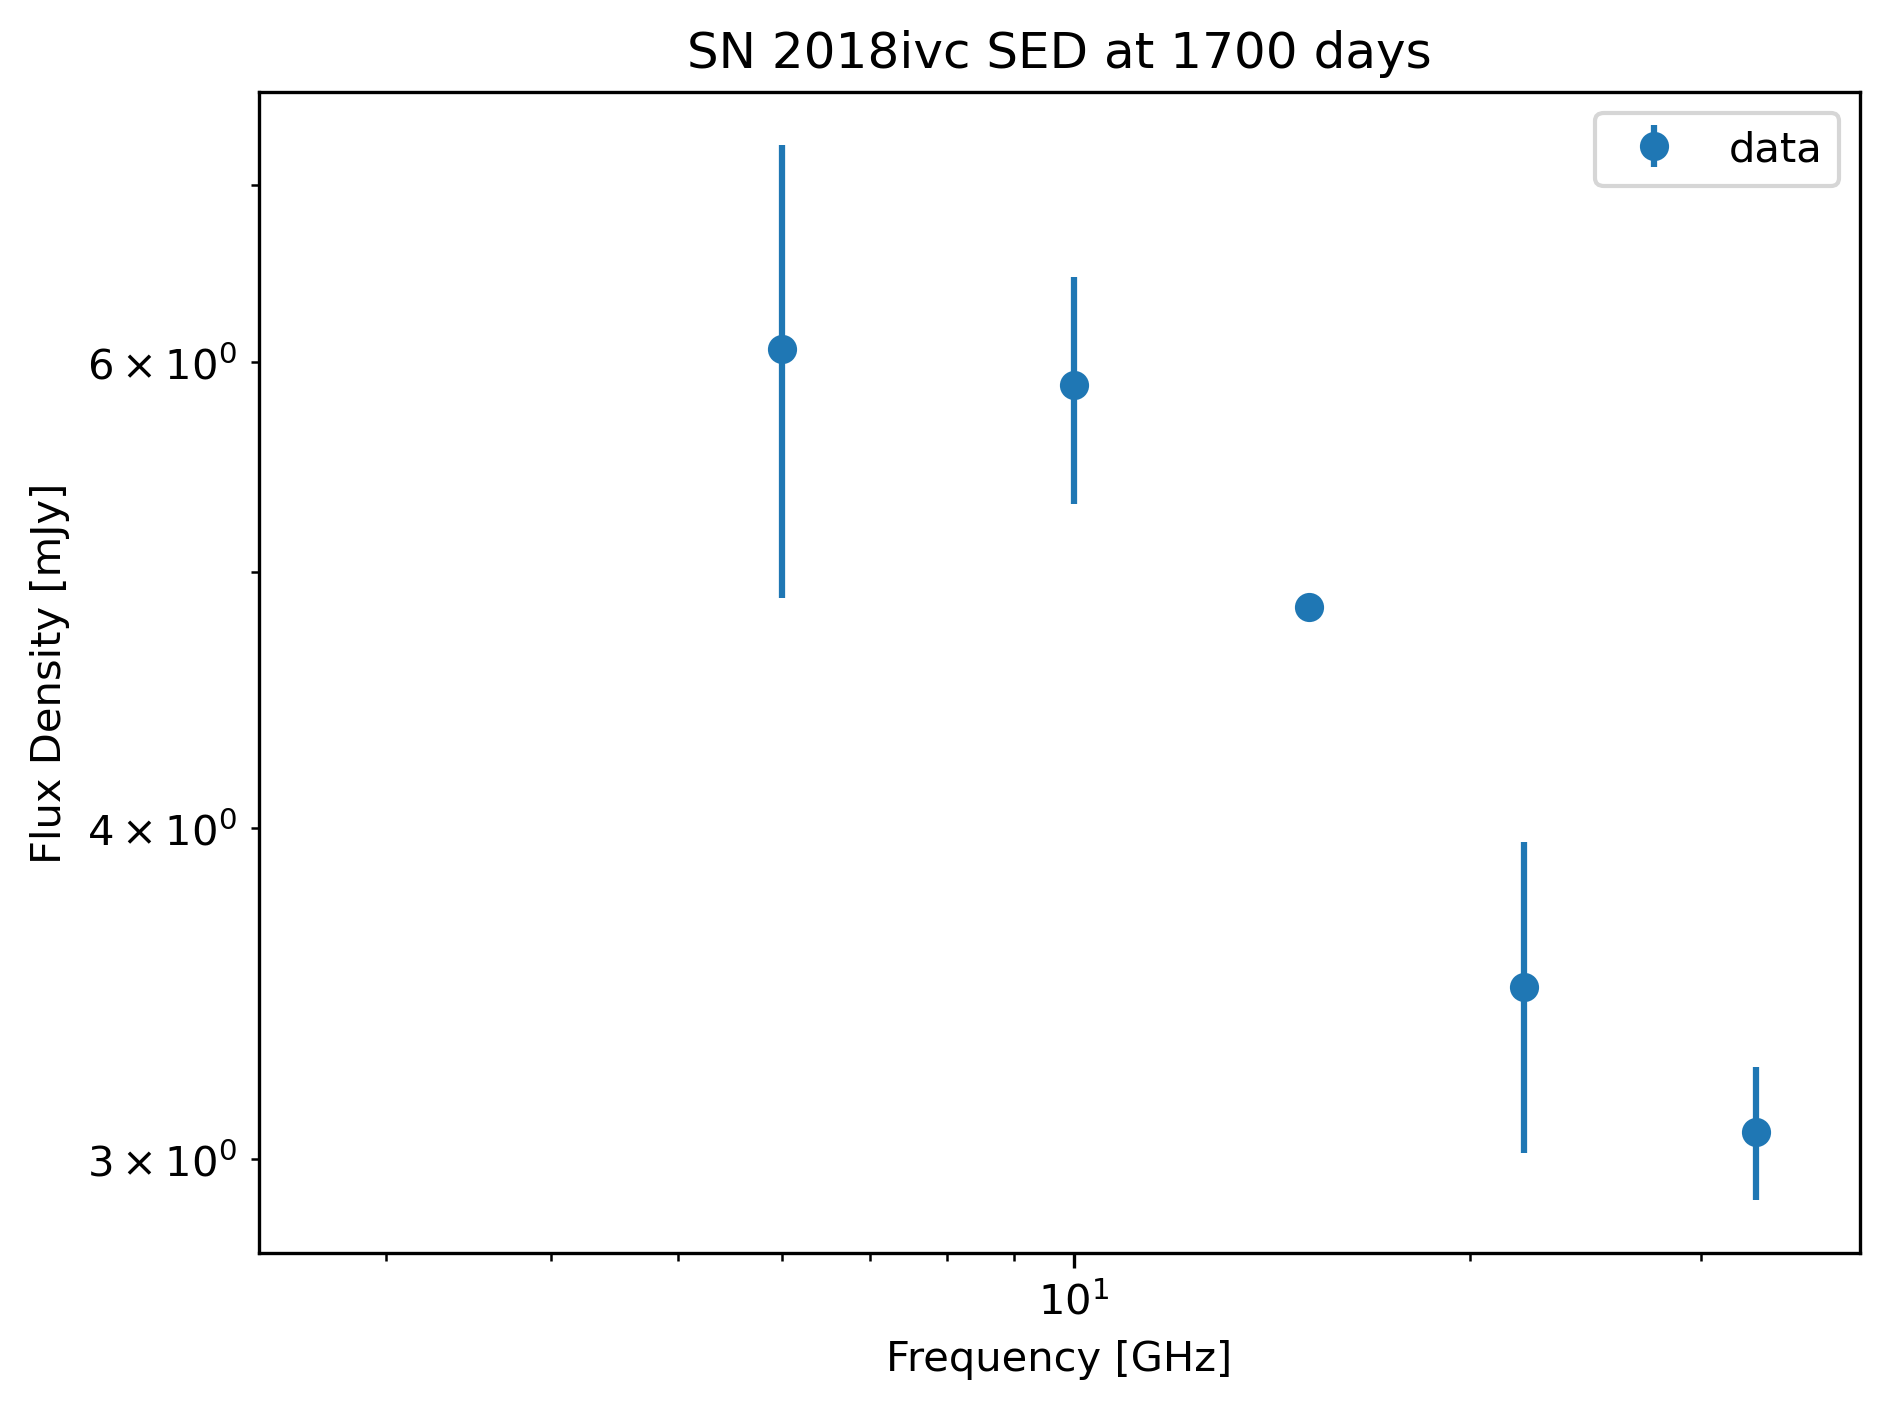

In [107]:
# 1700 day epoch
plt.figure(dpi=300)
data_1700 = data[data['phase'] == 1700]
x = data_1700['freq']
y = data_1700['flux']
yerr = data_1700['flux_err']

plt.errorbar(x, y, yerr=yerr, fmt='o', label='data')

# fit the F_SSA model by eye with 2 components
fmin = x_sed[0]
fmax = x_sed[1]
freq_range = np.logspace(np.log10(fmin), np.log10(fmax), 200)
F_by_eye_low = functions.F_FFA(freq_range, 12.0, 0.45, 1.85)
F_by_eye_high = functions.F_SSA(freq_range, 2.5, 1.0, 3.95)

# plt.plot(freq_range, F_by_eye_low, label='FFA low freq', color='orange', linestyle='--')
# plt.plot(freq_range, F_by_eye_high, label='SSA high freq', color='magenta')

plt.xscale('log')
plt.yscale('log')
plt.xlim(x_sed)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED at 1700 days')
plt.legend()
plt.tight_layout()
plt.show()

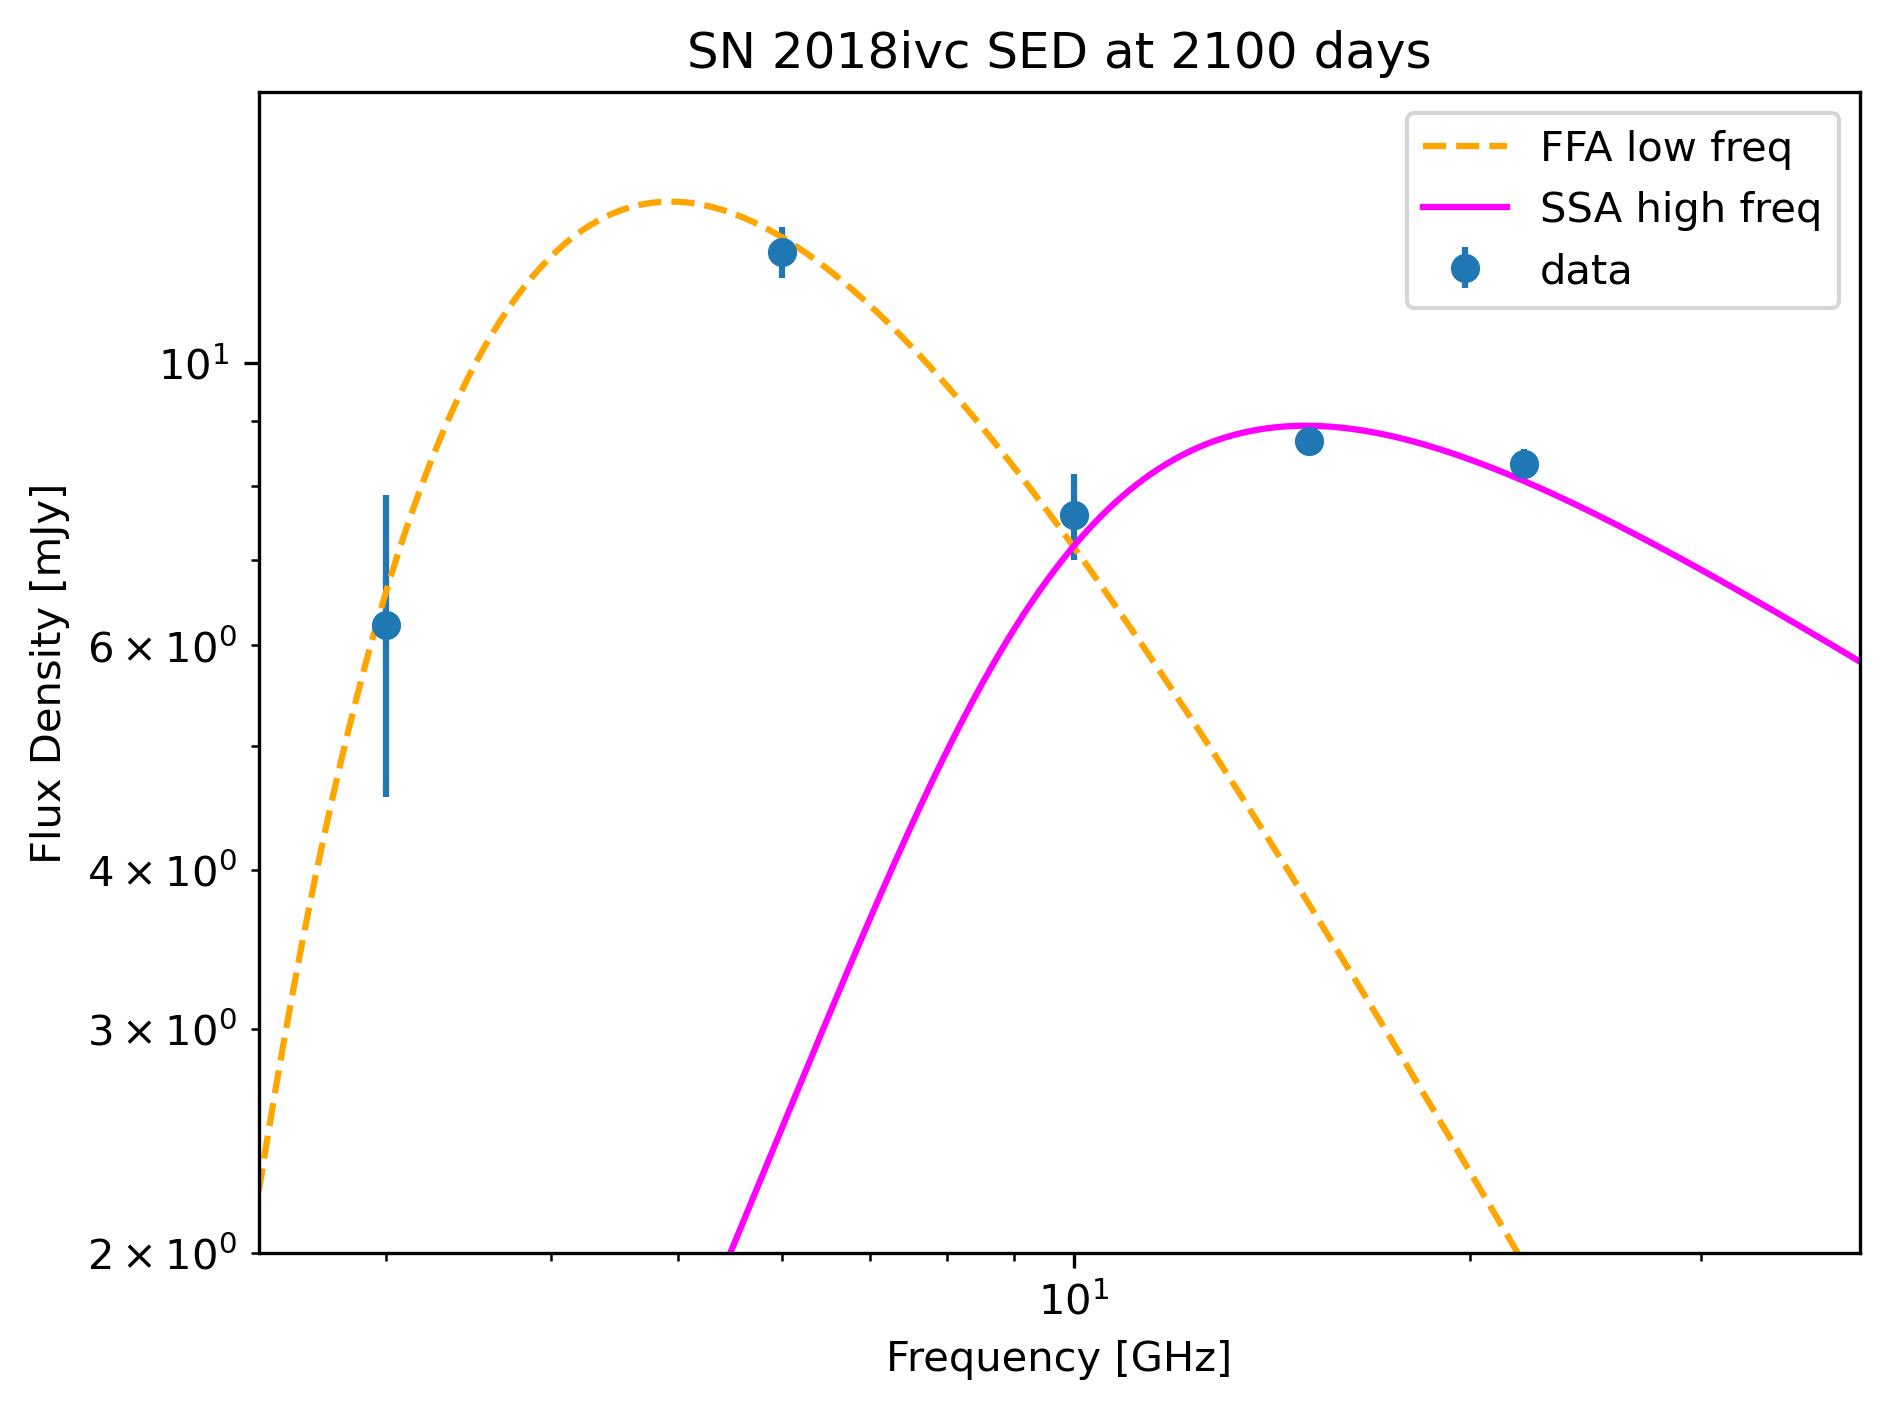

In [106]:
# 2100 day epoch
plt.figure(dpi=300)
data_2100 = data[data['phase'] == 2100]
x = data_2100['freq']
y = data_2100['flux']
yerr = data_2100['flux_err']

# fit the F_SSA model by eye with 2 components
fmin = x_sed[0]
fmax = x_sed[1]
freq_range = np.logspace(np.log10(fmin), np.log10(fmax), 200)
F_by_eye_low = functions.F_FFA(freq_range, 8.75, 0.2, 1.85)
F_by_eye_high = functions.F_SSA(freq_range, 9.0, 1.6, 2.30)

plt.errorbar(x, y, yerr=yerr, fmt='o', label='data')
plt.plot(freq_range, F_by_eye_low, label='FFA low freq', color='orange', linestyle='--')
plt.plot(freq_range, F_by_eye_high, label='SSA high freq', color='magenta')

plt.xscale('log')
plt.yscale('log')
plt.xlim(x_sed)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED at 2100 days')
plt.ylim(2.0, None)
plt.legend()
plt.tight_layout()
plt.show()

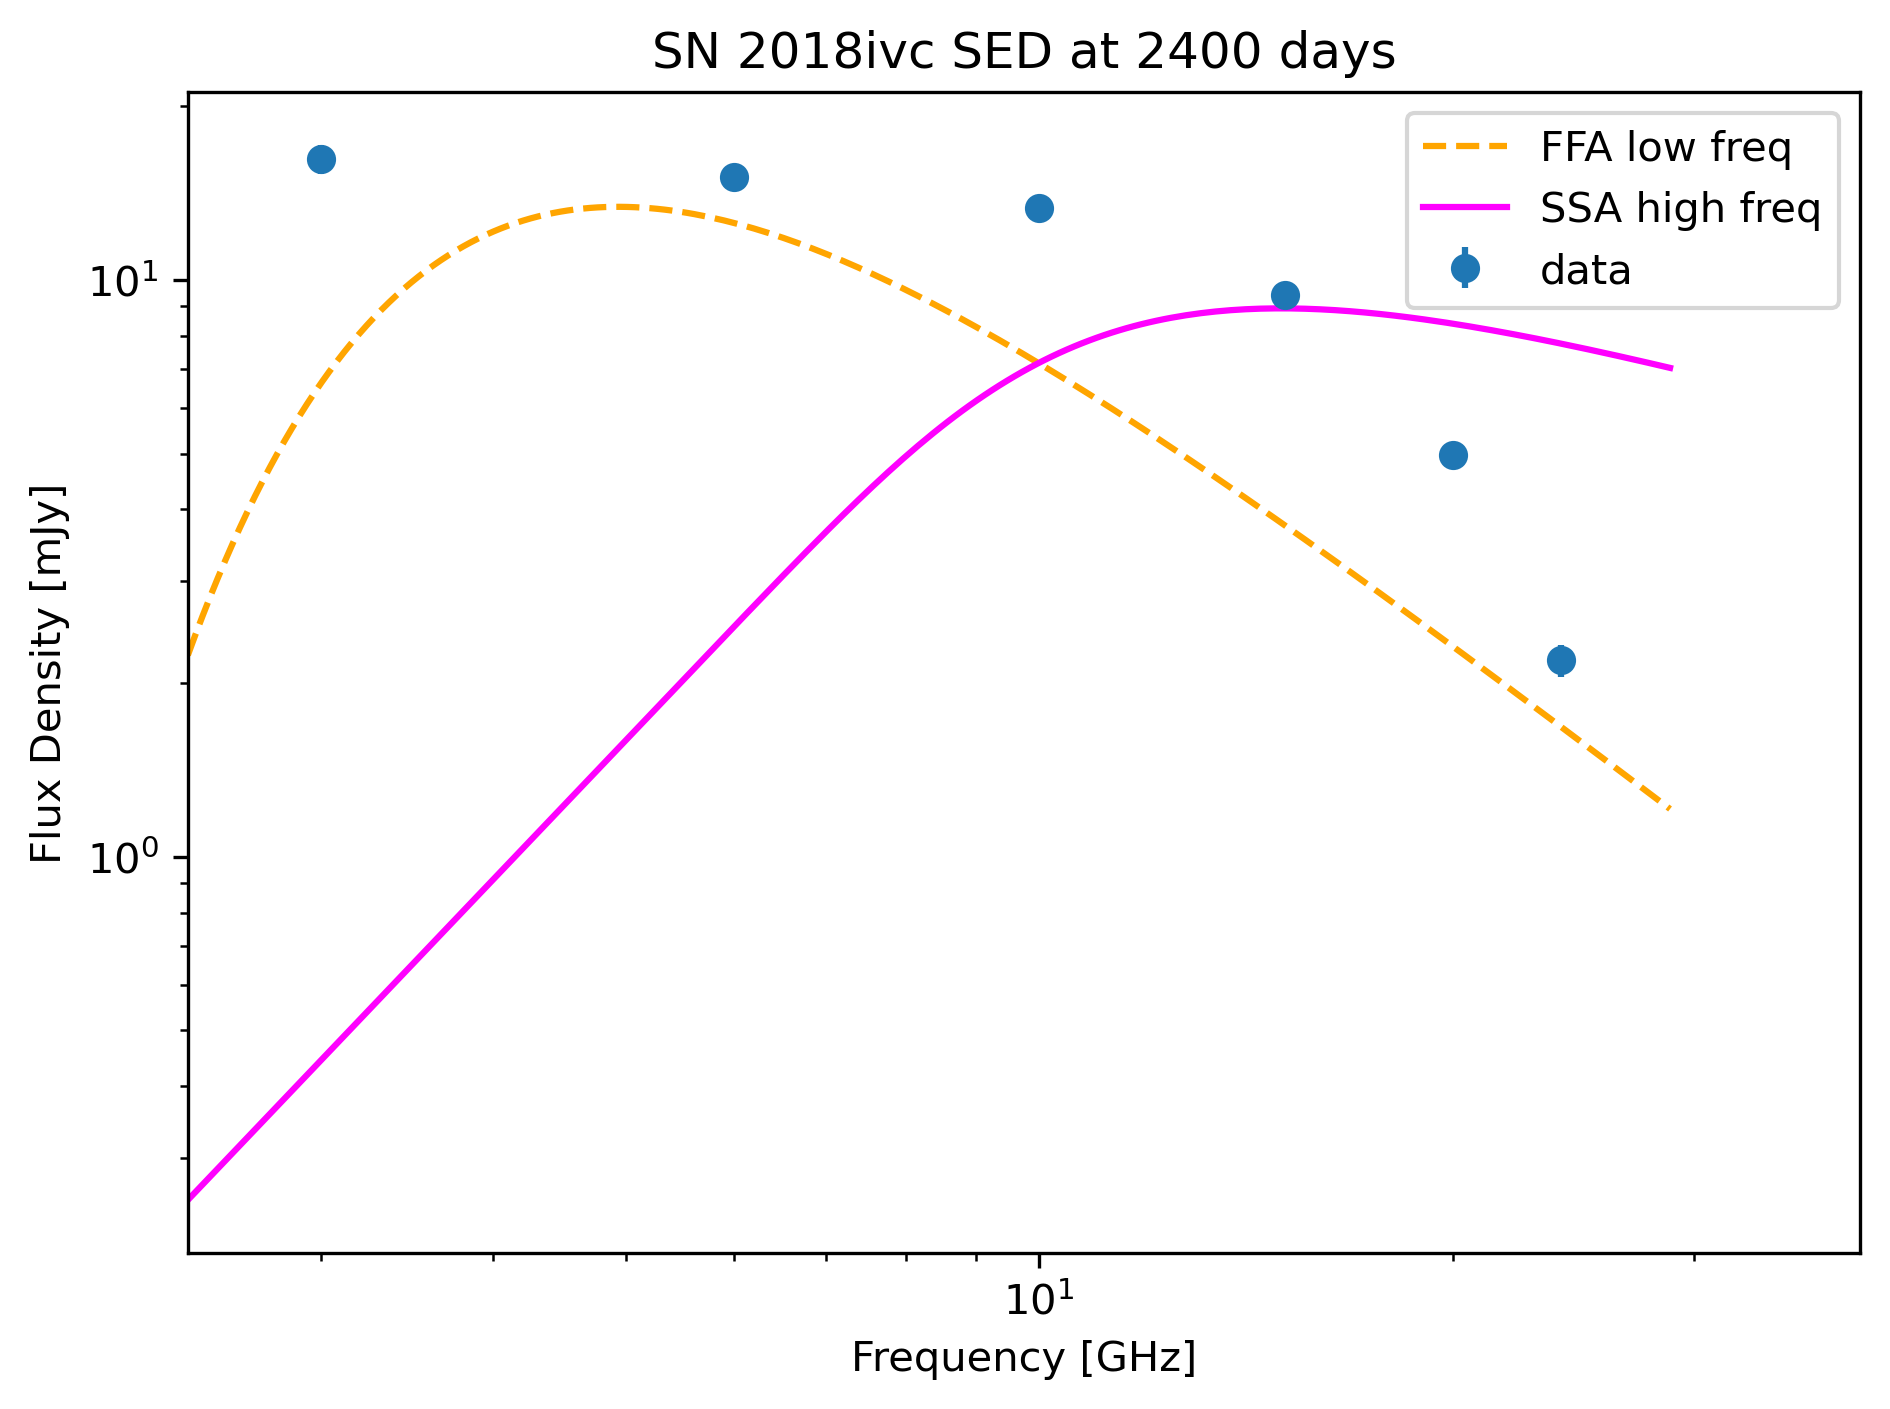

In [54]:
# 2400 day epoch
plt.figure(dpi=300)
data_2400 = data[data['phase'] == 2400]
x = data_2400['freq']
y = data_2400['flux']
yerr = data_2400['flux_err']

# fit the F_SSA model by eye with 2 components
fmin_early = data_2400['freq'].min() * 0.8
fmax_early = data_2400['freq'].max() * 1.2
freq_range = np.logspace(np.log10(fmin_early), np.log10(fmax_early), 200)
F_by_eye_low = functions.F_FFA(freq_range, 8.75, 0.2, 1.85)
F_by_eye_high = functions.F_SSA(freq_range, 9.0, 1.6, 2.30)

plt.errorbar(x, y, yerr=yerr, fmt='o', label='data')
plt.plot(freq_range, F_by_eye_low, label='FFA low freq', color='orange', linestyle='--')
plt.plot(freq_range, F_by_eye_high, label='SSA high freq', color='magenta')

plt.xscale('log')
plt.yscale('log')
plt.xlim(x_sed)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED at 2400 days')
plt.legend()
plt.tight_layout()
plt.show()

## Plot all the epochs on the same plot

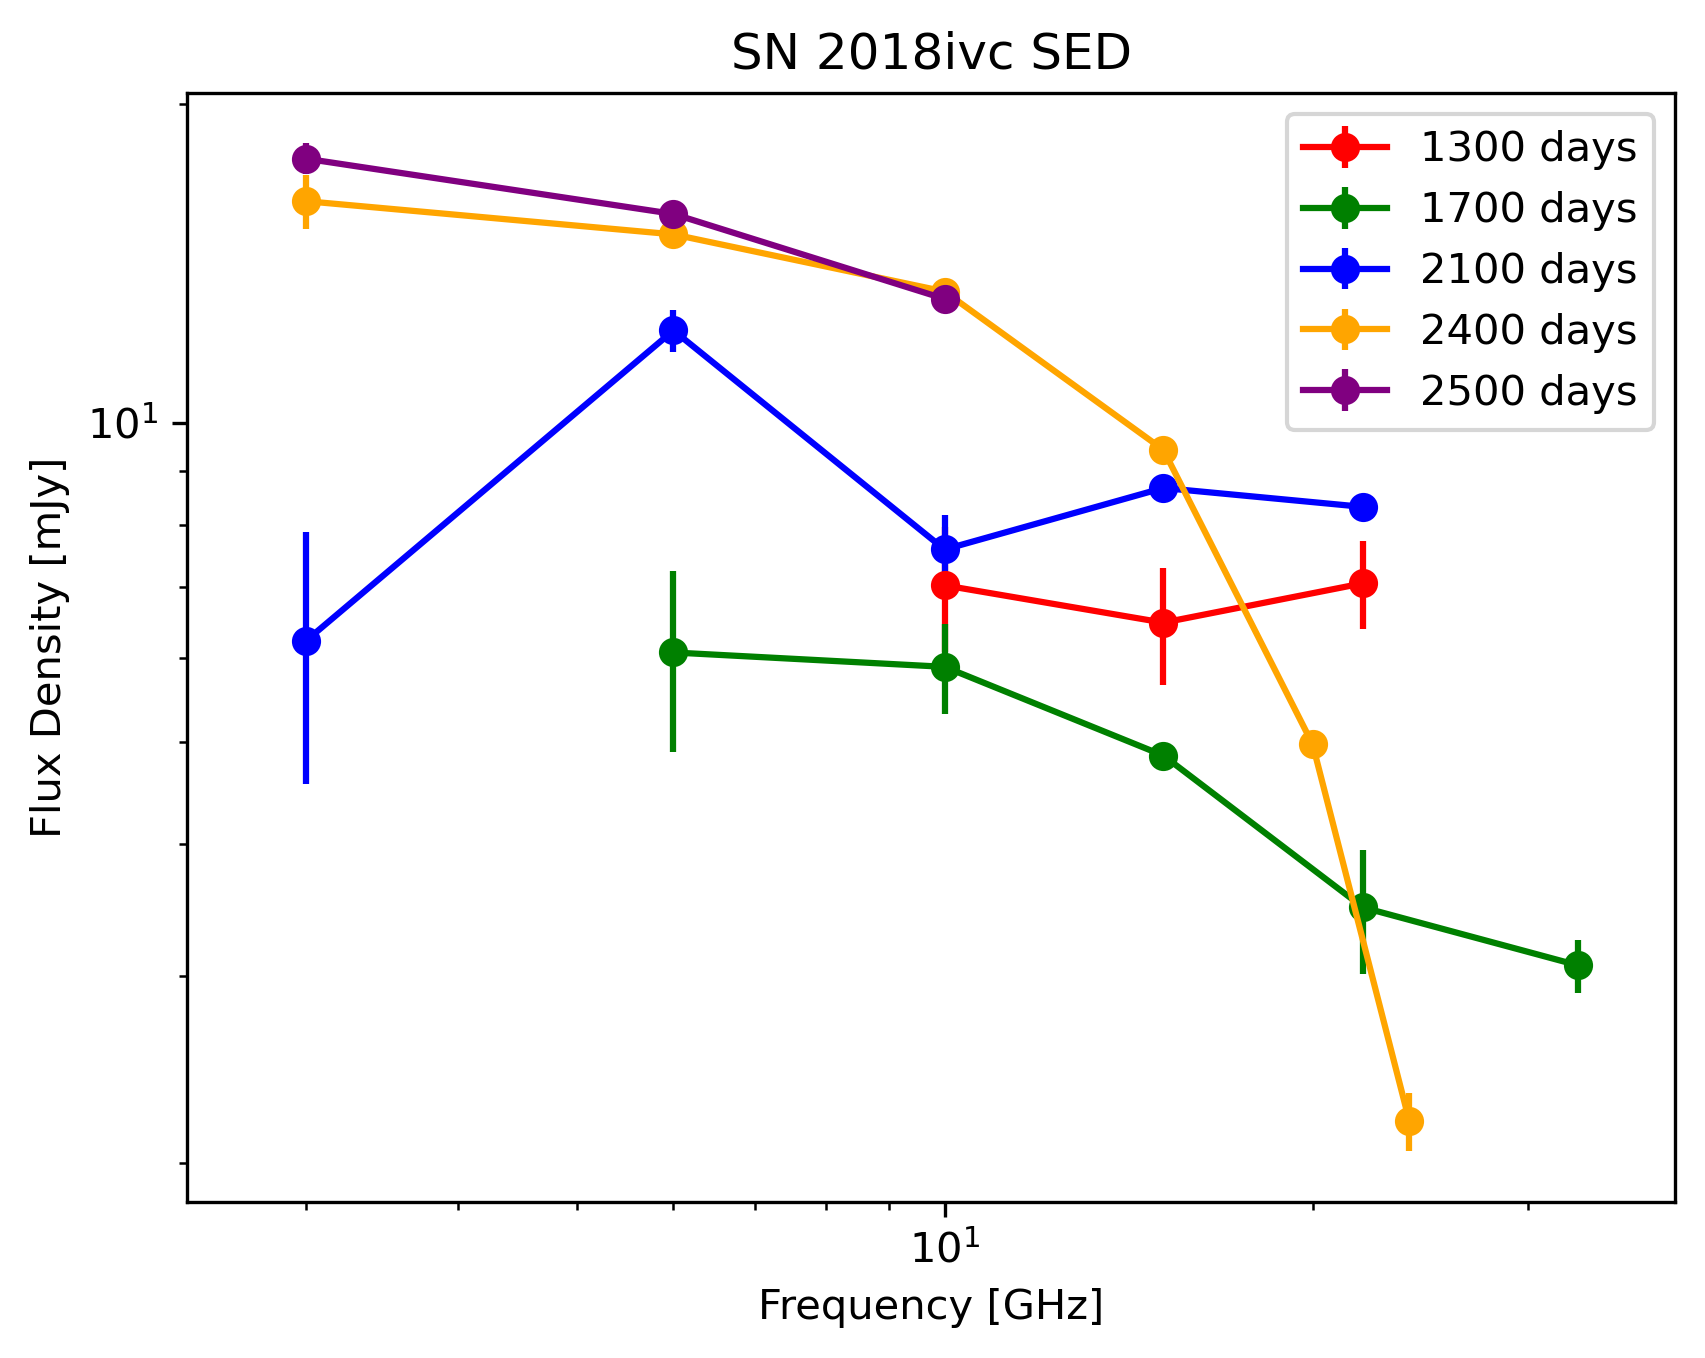

In [55]:
# plot all the epochs together
plt.figure(dpi=300)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
epochs = [1300, 1700, 2100, 2400, 2500]
for i, epoch in enumerate(epochs):
    data_epoch = data[data['phase'] == epoch]
    x = data_epoch['freq']
    y = data_epoch['flux']
    yerr = data_epoch['flux_err']
    plt.errorbar(x, y, yerr=yerr, fmt='-o', label=f'{epoch} days', color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlim(x_sed)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED')
plt.legend()

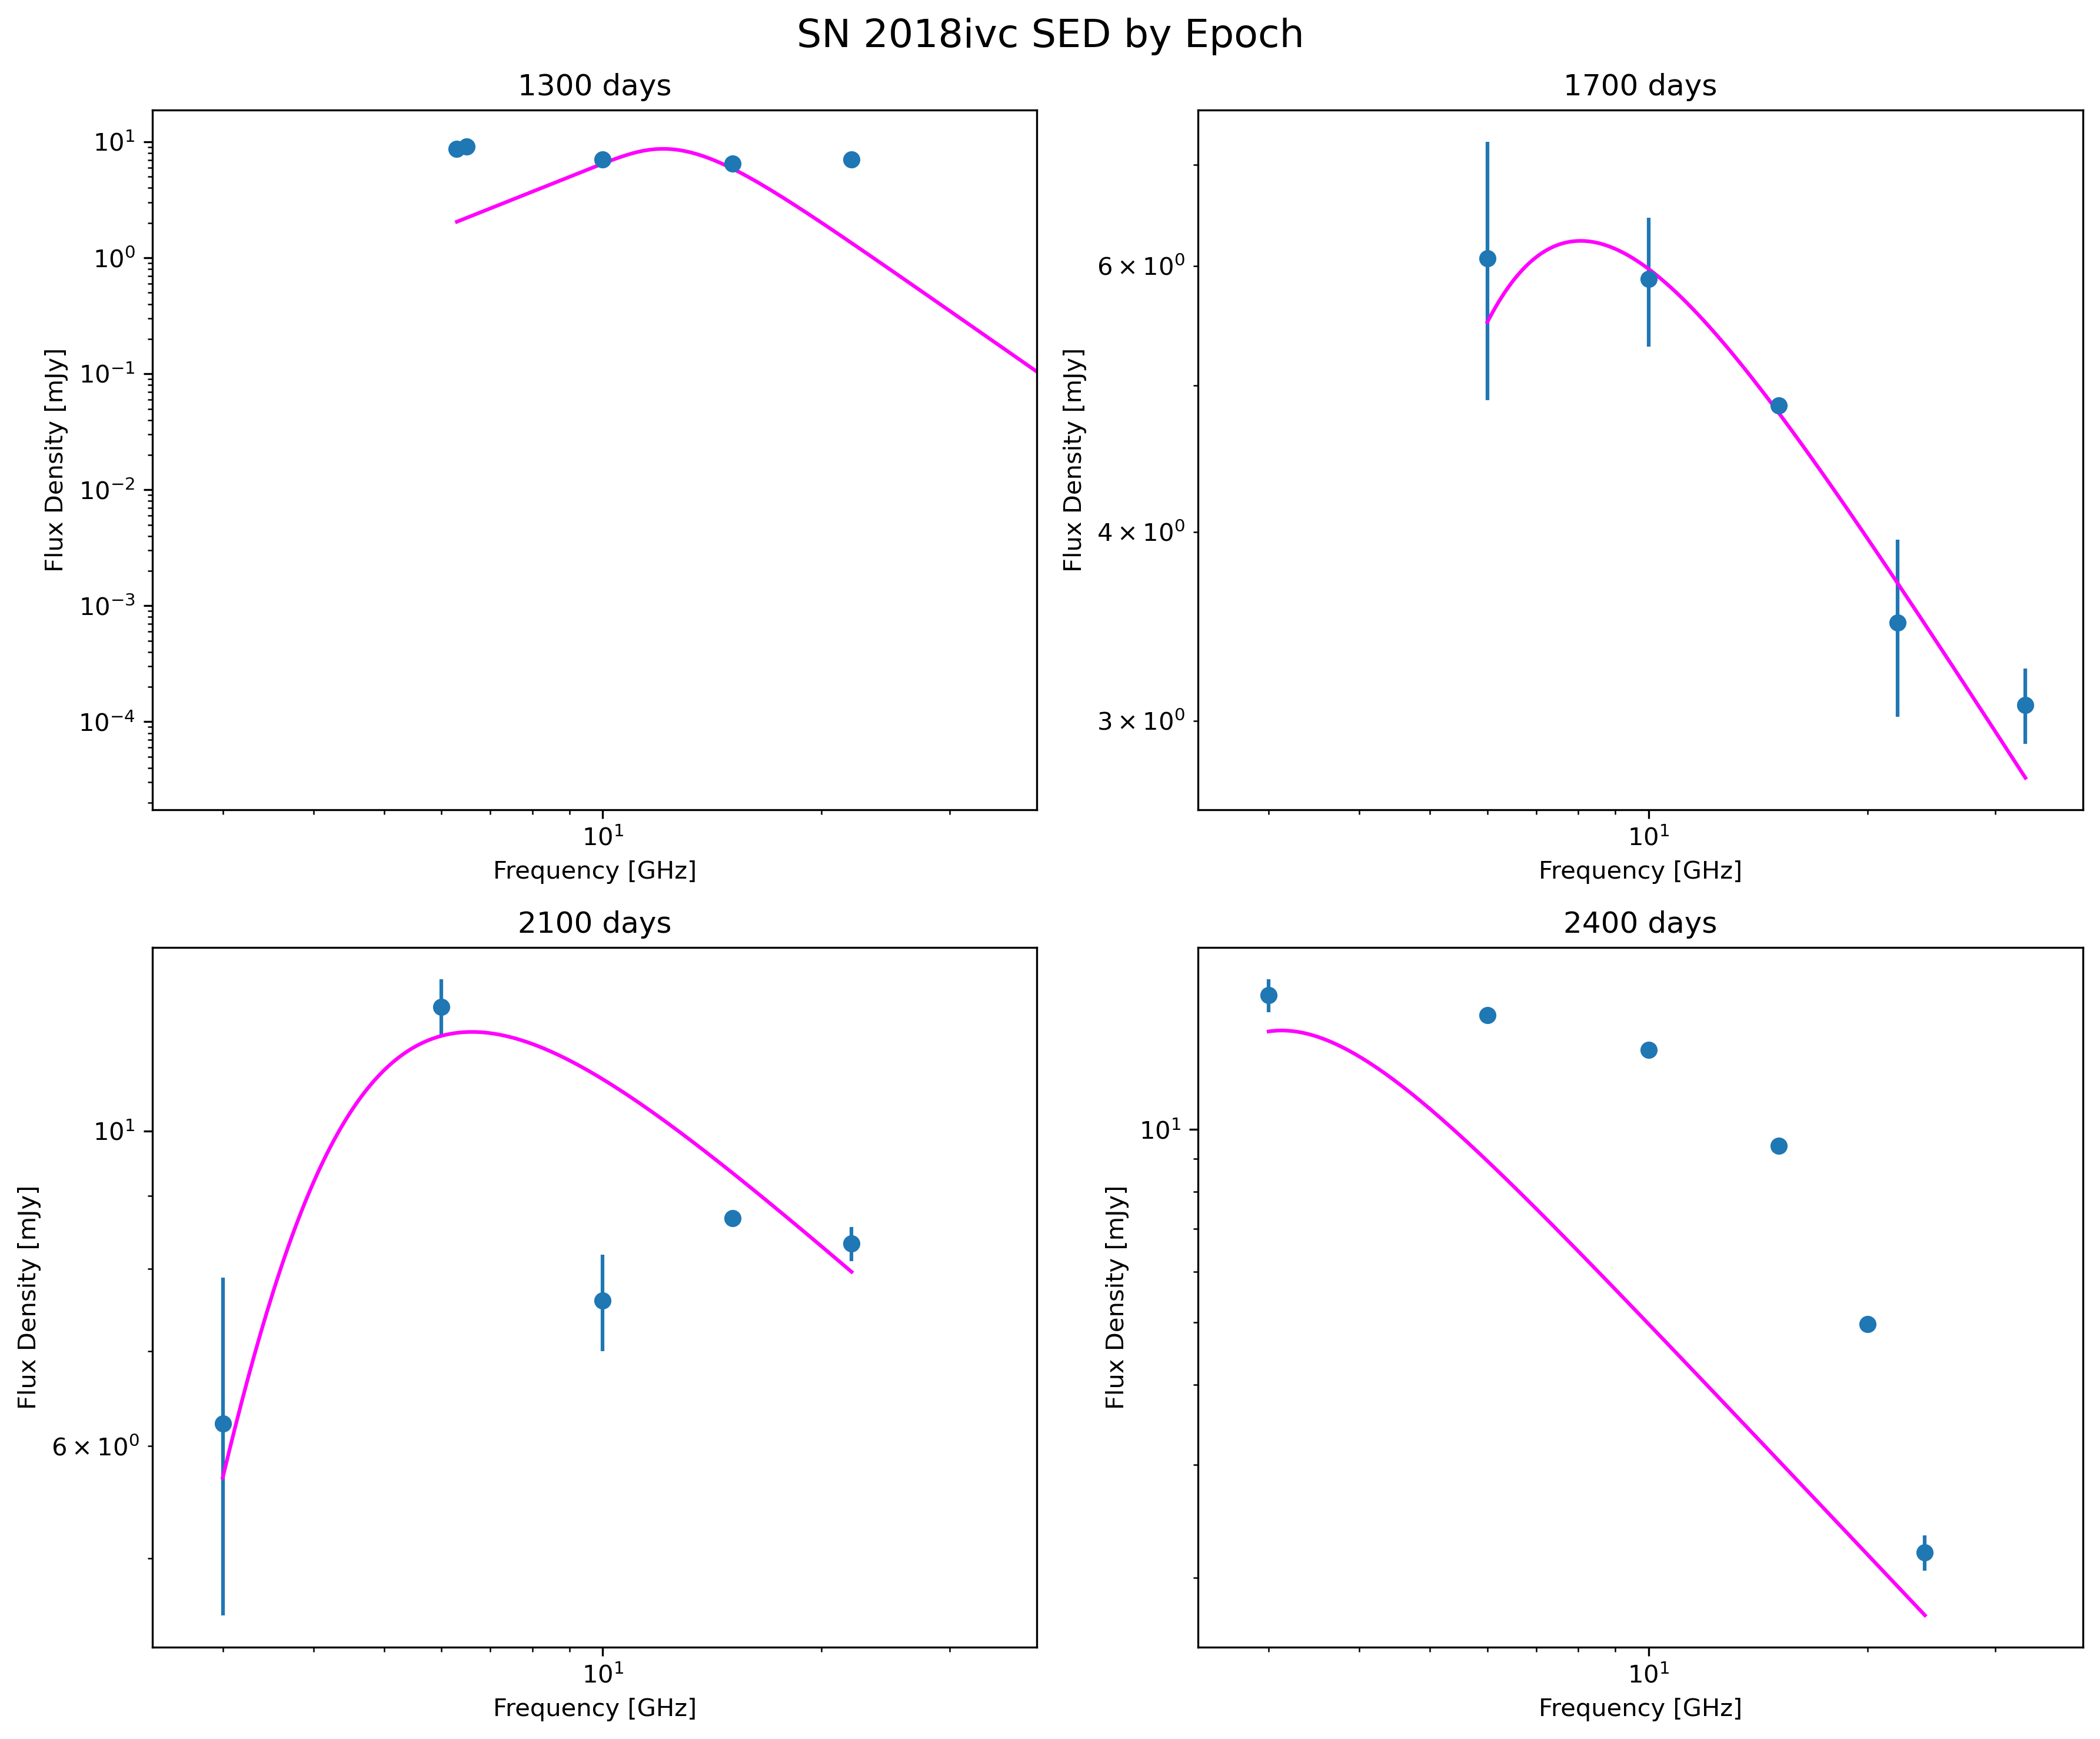

In [56]:
# Create a figure with 4 subplots for different epochs
fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=300)

# Define the epochs and corresponding data
epochs = [1300, 1700, 2100, 2400]
data_epochs = [data_1300, data_1700, data_2100, data_2400]

# Make a dictionary to hold the SSA parameters for each epoch
SSA_params = {
    1300: {'K1': 6.5, 'K2': 6.6, 'p': 9.75},
    1700: {'K1': 27.0, 'K2': 0.25, 'p': 2.50},
    2100: {'K1': 120, 'K2': 0.095, 'p': 1.90},
    2400: {'K1': 500.0, 'K2': 0.01, 'p': 3.40}
}

for ax, epoch, data_epoch in zip(axs.flatten(), epochs, data_epochs):
    x = data_epoch['freq']
    y = data_epoch['flux']
    yerr = data_epoch['flux_err']
    
    ax.errorbar(x, y, yerr=yerr, fmt='o', label=f'{epoch} days')
    
    # Calculate SSA flux density using the parameters
    K1 = SSA_params[epoch]['K1']
    K2 = SSA_params[epoch]['K2']
    p = SSA_params[epoch]['p']
    
    # Define the frequency range for the SSA model
    freq_range = np.logspace(np.log10(x.min()), np.log10(x.max()), 200)
    SSA_flux = functions.F_SSA(freq_range, K1, K2, p)
    
    ax.plot(freq_range, SSA_flux, label='SSA Model', color='magenta')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(x_sed)
    ax.set_xlabel('Frequency [GHz]')
    ax.set_ylabel('Flux Density [mJy]')
    ax.set_title(f'{epoch} days')

plt.suptitle('SN 2018ivc SED by Epoch', fontsize=16)
plt.tight_layout()
plt.show()

# Early stage
Model the fluxes from 0-1300 days, including all the previously published ALMA data

In [4]:
data_early = data[((data['phase'] == 1300) & (data['flux'] > 0.0))]

In [5]:
# get initial guess for parameters from simple one-epoch fit (1300 days)
mask_1300_early = data_early['phase'] == 1300
nu_1300_early = data_early['freq'][mask_1300_early]
F_1300_early = data_early['flux'][mask_1300_early]
Ferr_1300_early = data_early['flux_err'][mask_1300_early]

# get the spectral index alpha
lognu_early = np.log10(nu_1300_early)
logF_early  = np.log10(F_1300_early)
alpha_early, logA_early = np.polyfit(lognu_early, logF_early, 1)   # F ~ A * nu^alpha

p_init_early = 1 - 2*alpha_early
print("alpha_early ~", alpha_early, "=> p_init_early ~", p_init_early)

# Fit F_SSA (no time) to the 1300-day data
p0_simple_early   = [np.max(F_1300_early), 10.0, p_init_early]  # K1, K2, p
bounds_simple_early = ([0.0, 0.0, 1.0], [np.inf, 1e6, 4.0])

(K1_s_early, K2_s_early, p_s_early), cov_s_early = curve_fit(
    functions.F_SSA,
    nu_1300_early,
    F_1300_early,
    p0=p0_simple_early,
    bounds=bounds_simple_early,
    sigma=Ferr_1300_early,
    absolute_sigma=True
)

print("Simple SSA fit (early):\nK1 ~ ", K1_s_early, "\nK2 ~ ", K2_s_early, "\np ~ ", p_s_early)

alpha_early ~ -0.5707041199675404 => p_init_early ~ 2.141408239935081
Simple SSA fit (early):
K1 ~  30.528739980889384 
K2 ~  0.2887153350101707 
p ~  2.95909979998574


In [6]:
# once I have more than one epoch, can get intial guesses for a and b

In [7]:
# use the initial guesses from one epoch and light curve fits
initial_guess_early = [K1_s_early, K2_s_early, p_s_early, 0.0, 0.0]
bounds_early = (
    [0.0,   0.0,  1.0, -10.0, -10.0],   # lower bounds
    [np.inf, np.inf, 4.0,  10.0,  10.0] # upper bounds
)

results_early = functions.calc_params(data_early, functions.F_SSA_time, initial_guess_early, bounds_early)

K1_early = results_early['K1'][0]
K2_early = results_early['K2'][0]
p_early  = results_early['p'][0]
a_early  = results_early['a'][0]
b_early  = results_early['b'][0]

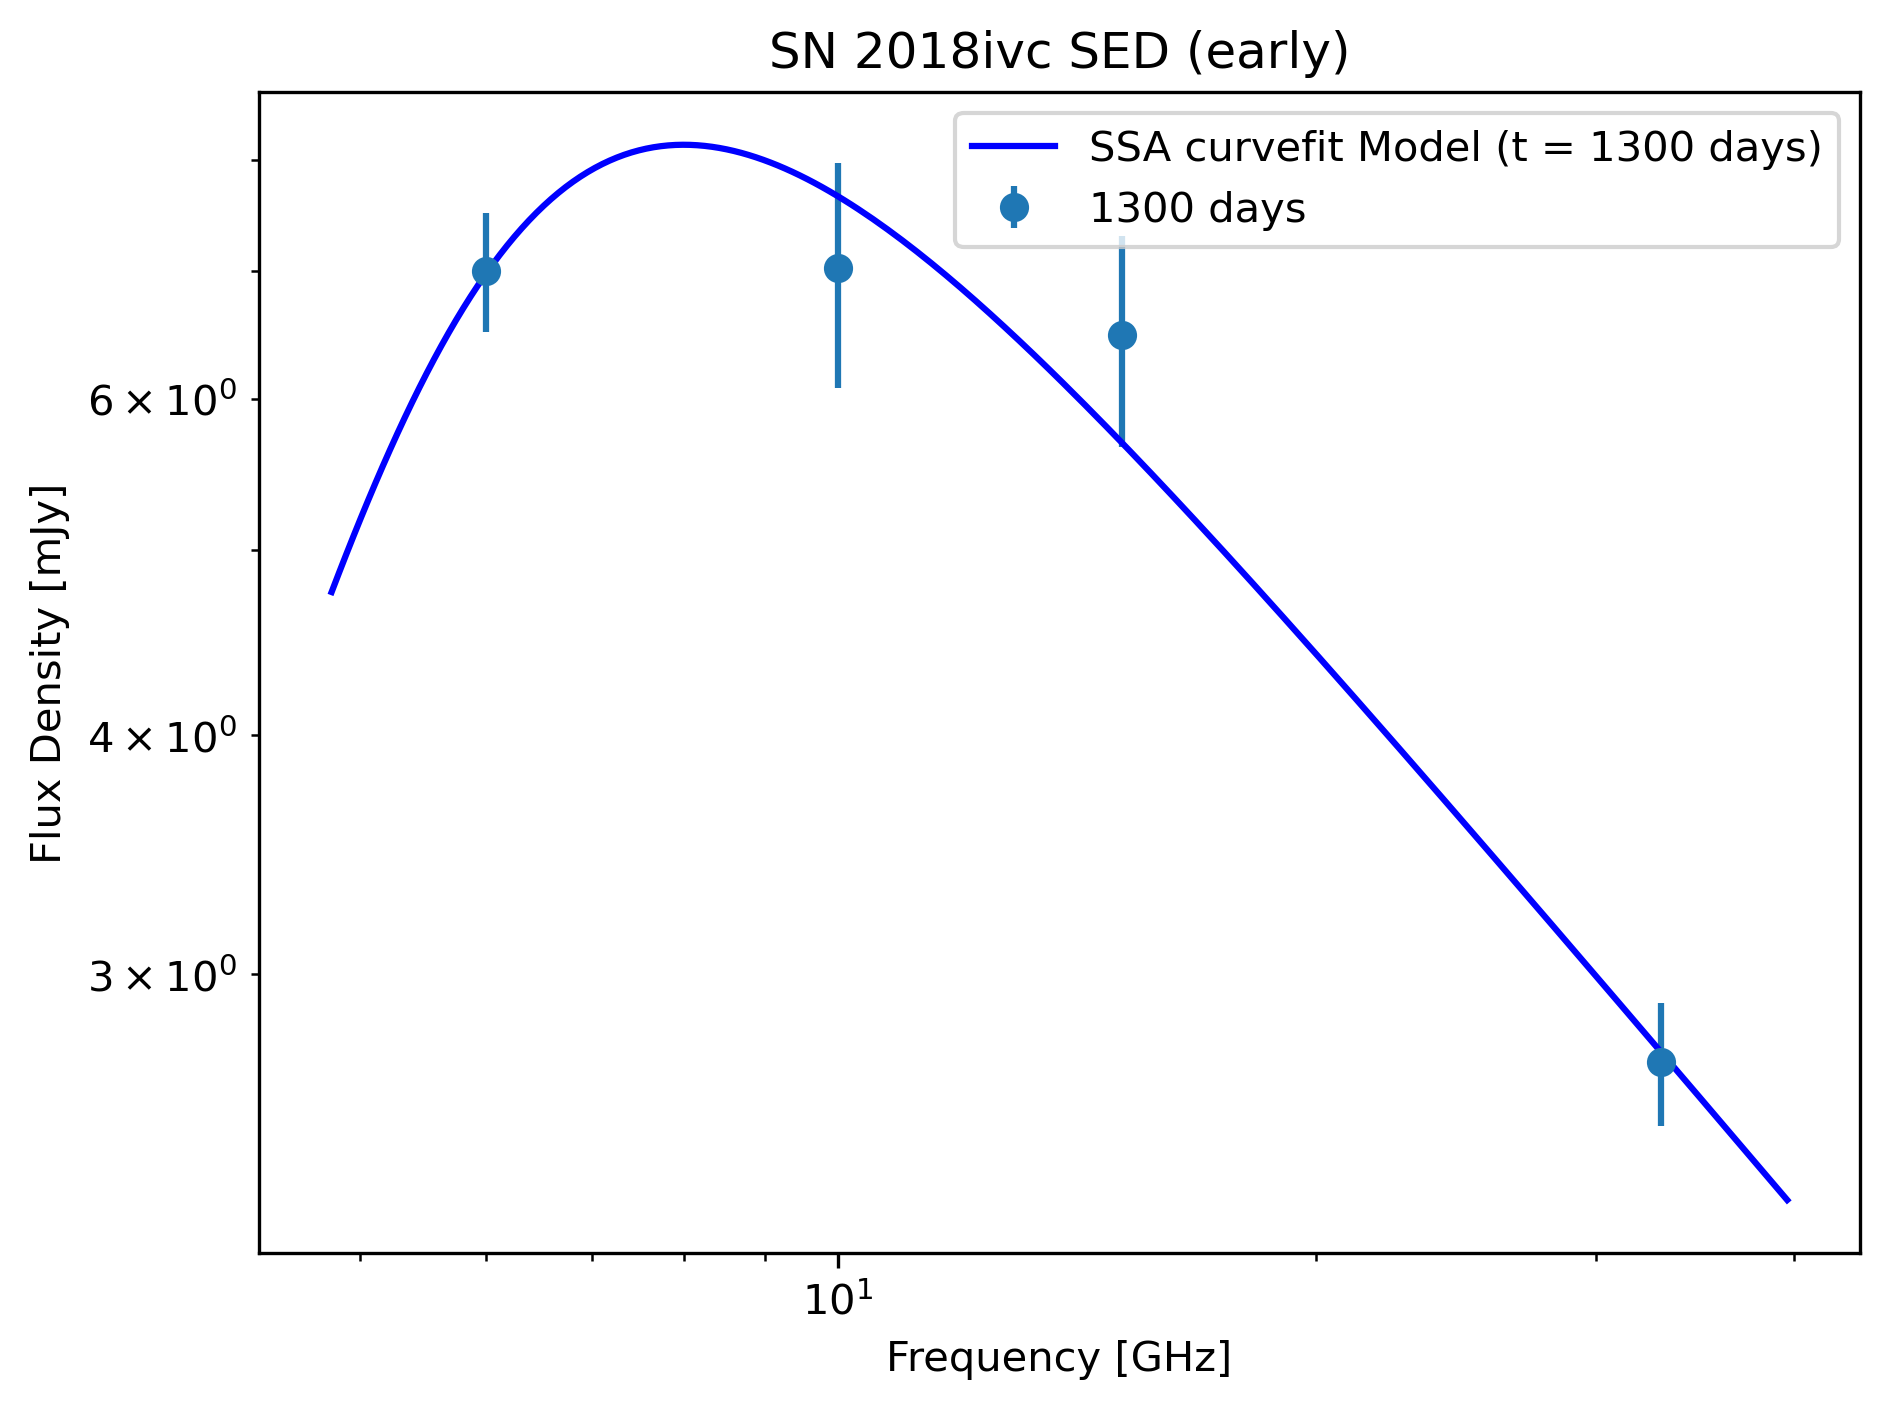

In [8]:
# plot the initial guess SED at a specific epoch
t_plot_early = 1300.0 

# Frequency grid for the model SED 
fmin_early = data_early['freq'].min() * 0.8
fmax_early = data_early['freq'].max() * 1.2
freq_model_early = np.logspace(np.log10(fmin_early), np.log10(fmax_early), 200)

# Evaluate the SSA model using the fitted parameters
flux_model_early = functions.F_SSA_time(freq_model_early, t_plot_early, K1_early, K2_early, p_early, a_early, b_early)

plt.figure(dpi=300)

# Plot the data, color-coded by phase
for phase_val_early in np.unique(data_early['phase']):
    mask_phase_early = data_early['phase'] == phase_val_early
    plt.errorbar(
        data_early['freq'][mask_phase_early],
        data_early['flux'][mask_phase_early],
        yerr=data_early['flux_err'][mask_phase_early],
        fmt='o',
        label=f'{phase_val_early:.0f} days'
    )

# Plot the model SED
plt.plot(freq_model_early, flux_model_early, 'b-', label=f'SSA curvefit Model (t = {t_plot_early:.0f} days)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED (early)')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# use the initial guesses from curve fitting to initialize MCMC (early)
sampler_early = functions.run_mcmc([K1_early, K2_early, p_early, a_early, b_early], data_early, niters=2000, nwalkers=400)
chain_early = sampler_early.chain

Computation time: 108.458039 s


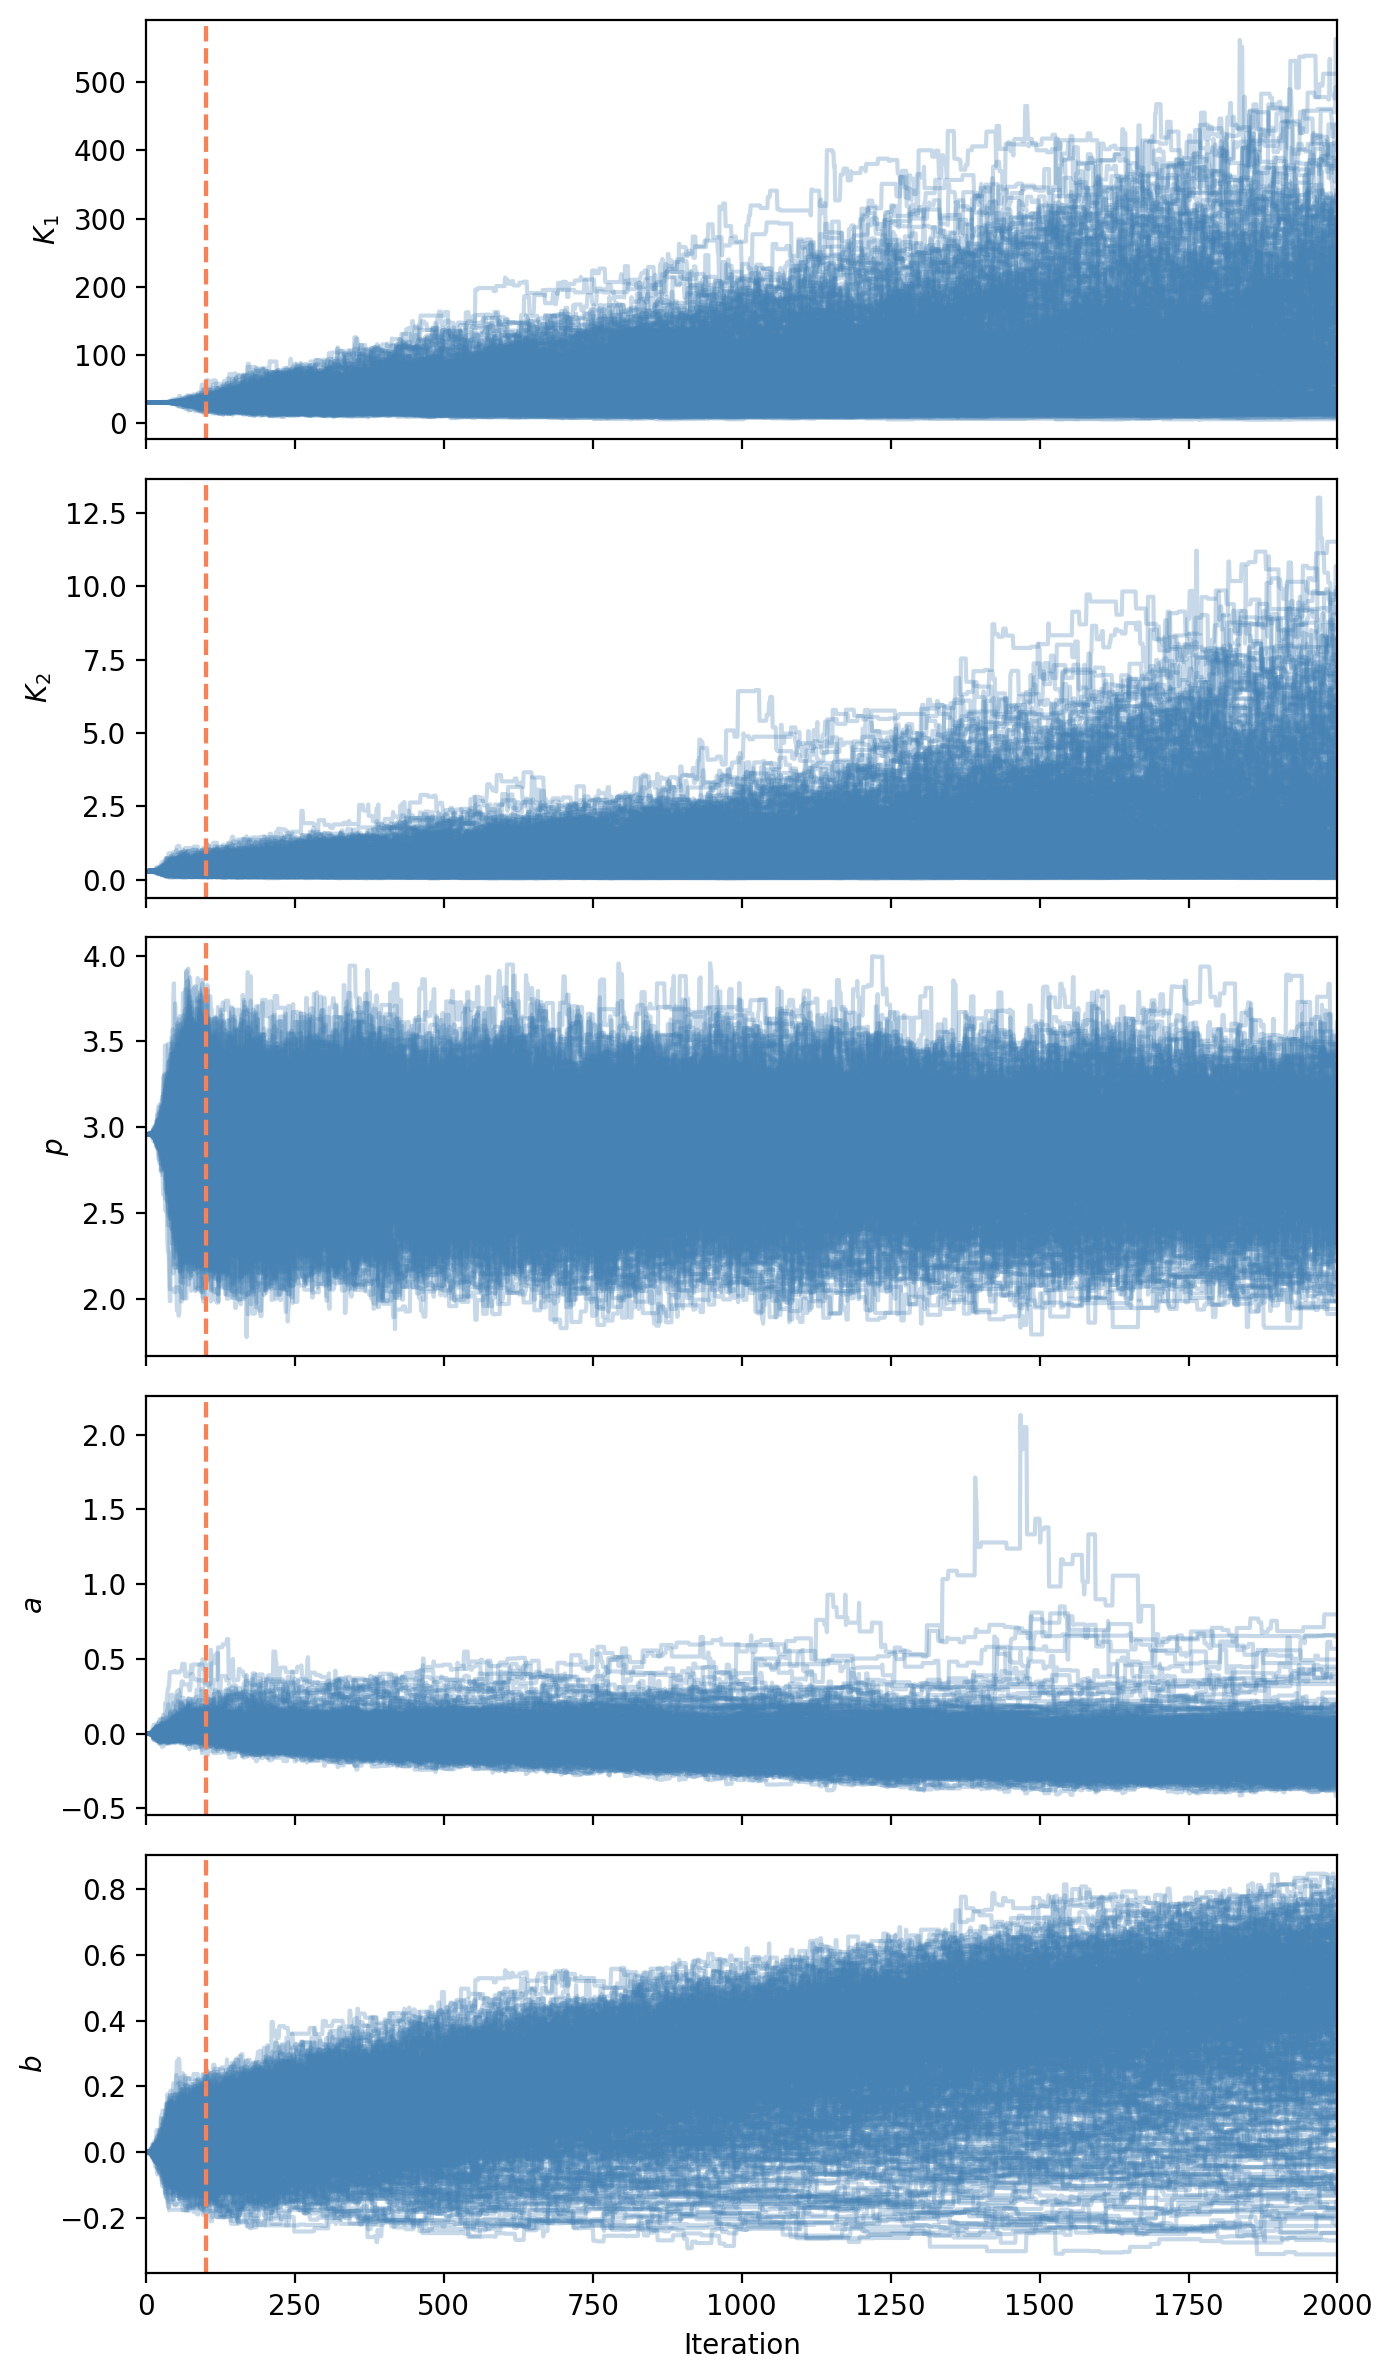

In [10]:
# plot the chains to determine burn in phase
chain_cut_early = 100
functions.make_chain_plot(chain_early, chain_cut_early)

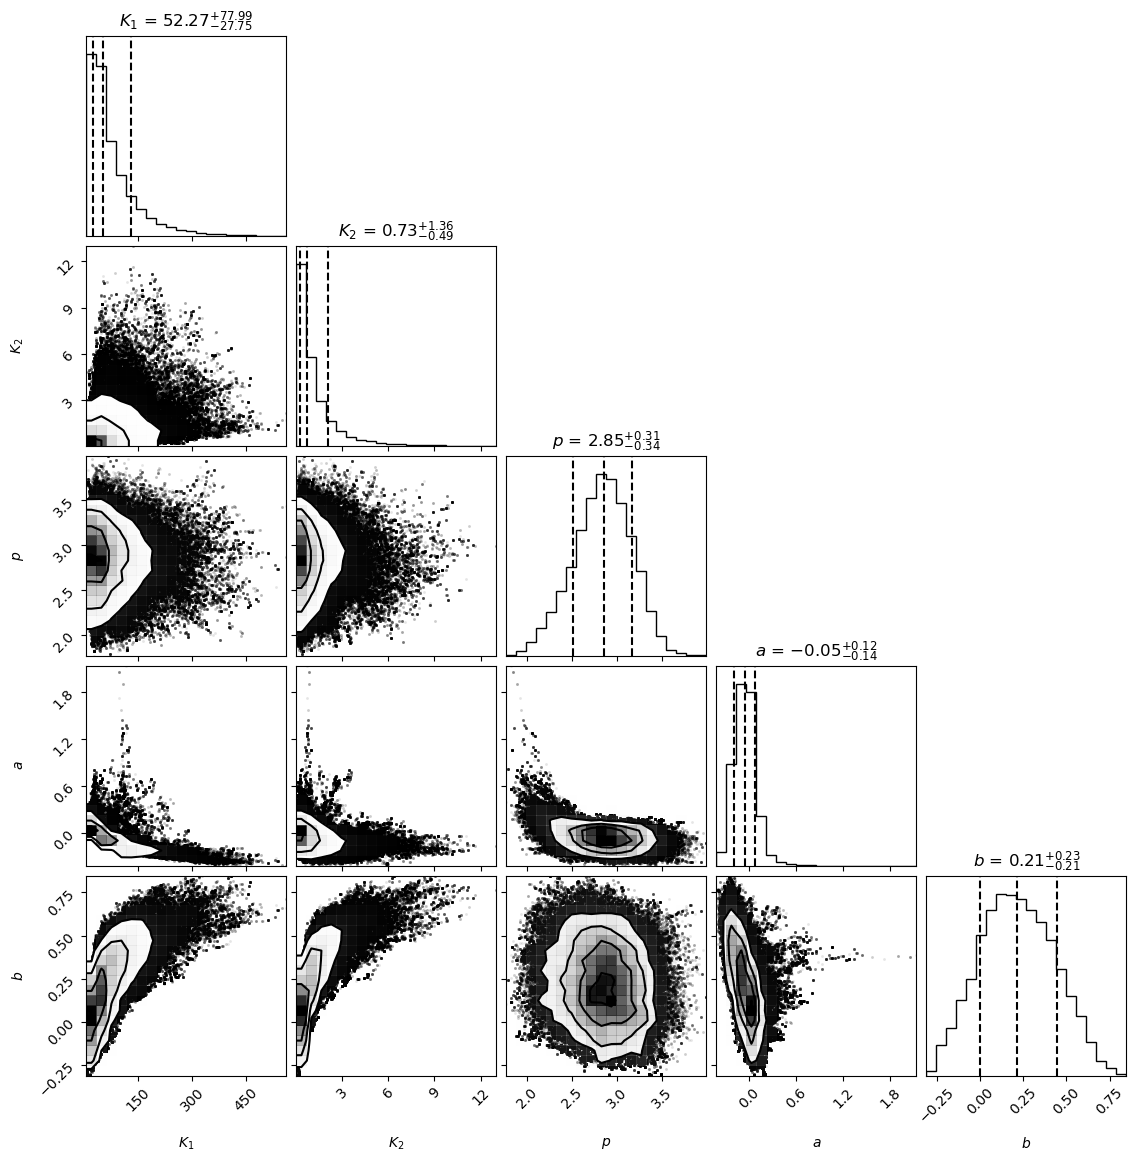

In [11]:
# make corner plots and get the best fit values and uncertainties
good_chain_early = chain_early[:, chain_cut_early:, :]
functions.make_corner_plot(good_chain_early)
best_params_early = functions.get_best_params(good_chain_early)

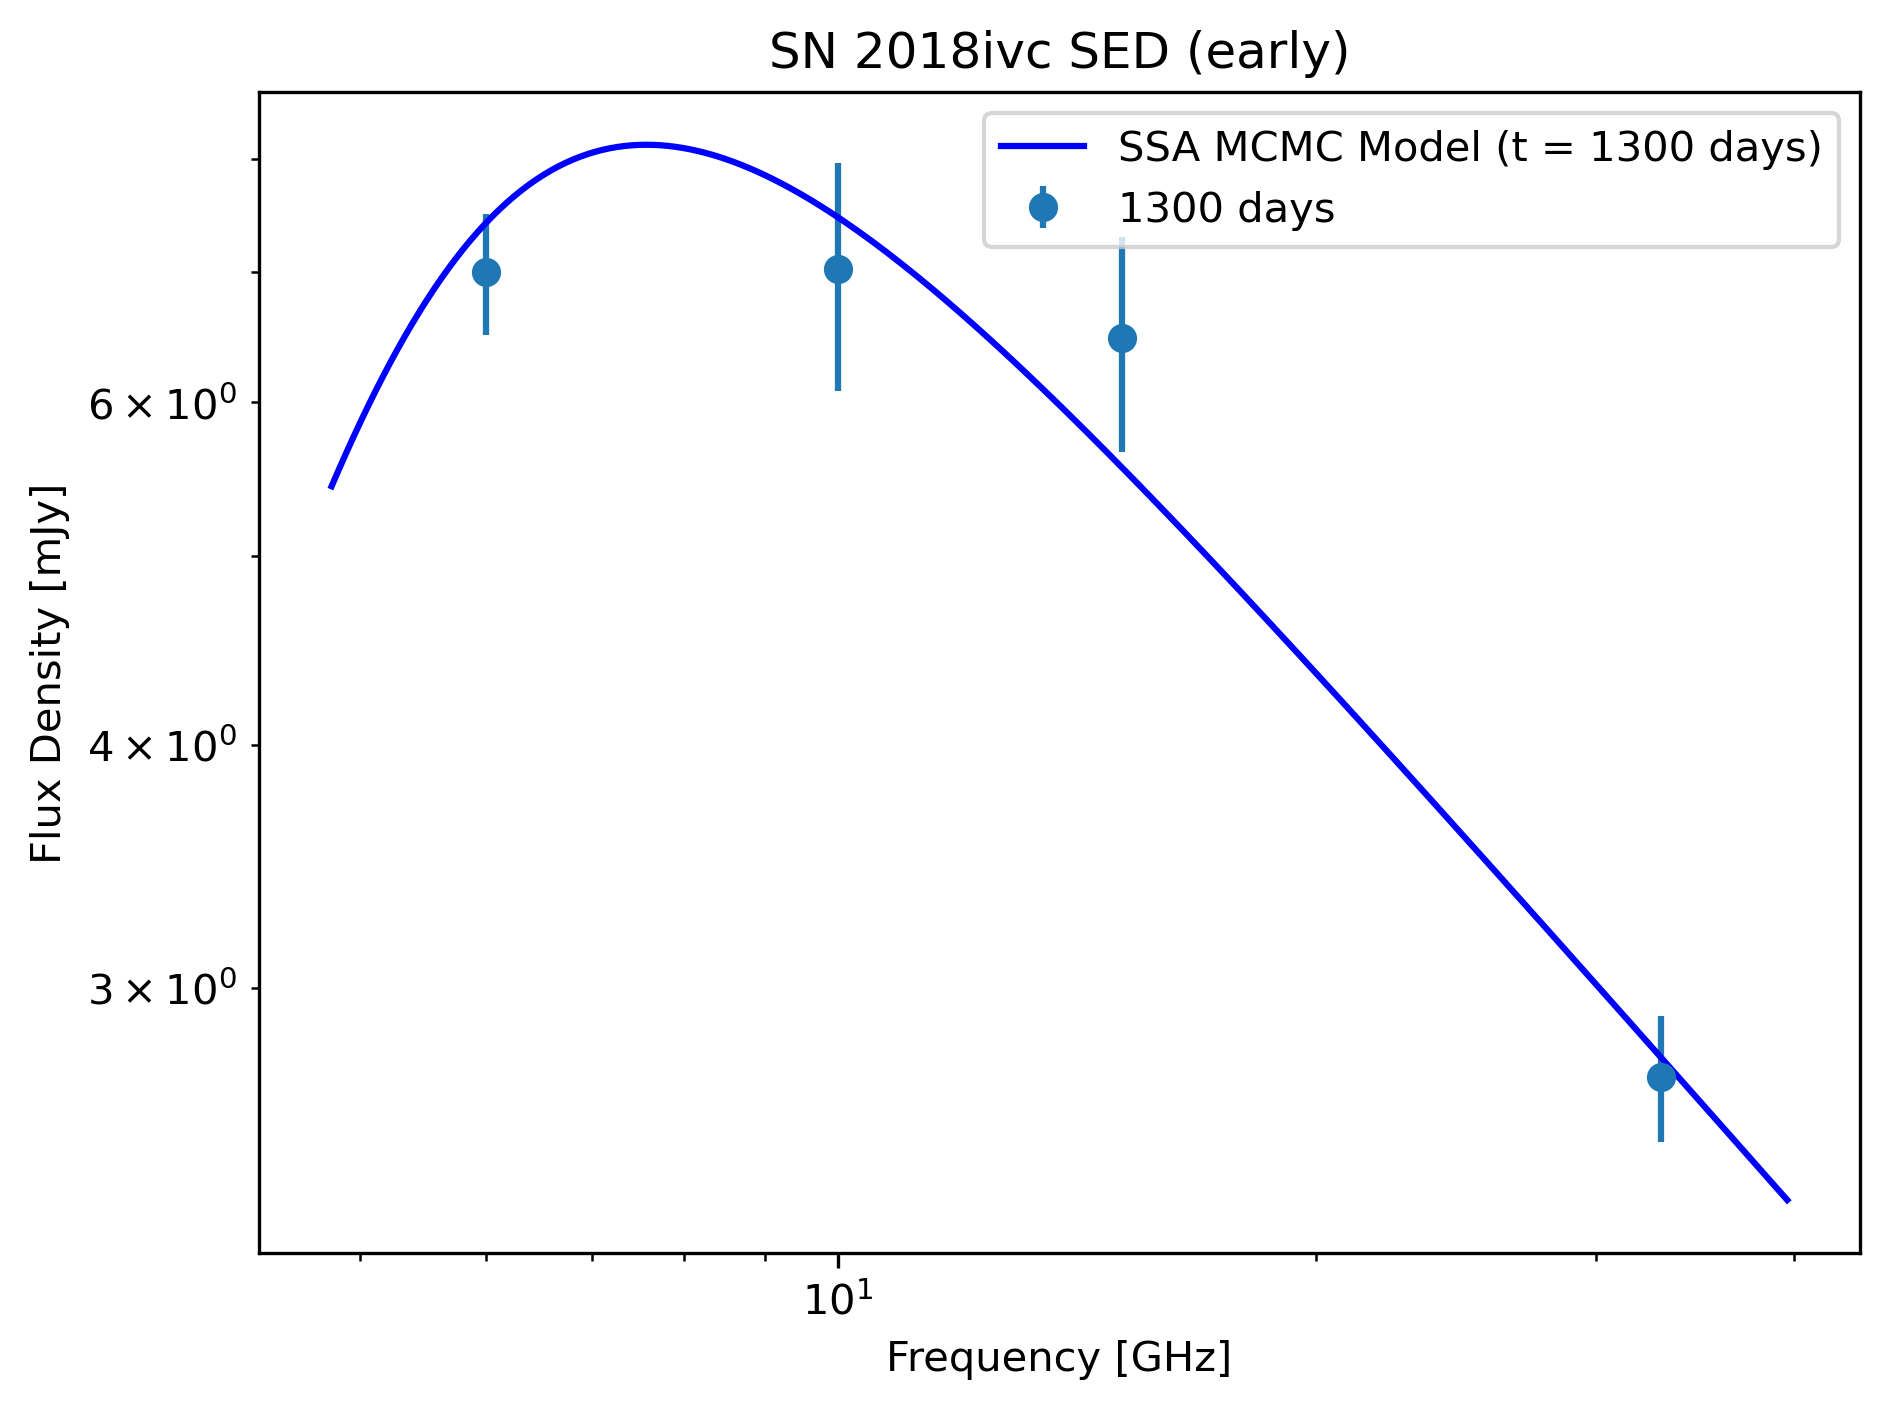

In [12]:

# now plot the MCMC model and data (early)
t_plot_early = 1300.0 

# Frequency grid for the model SED 
fmin_early = data_early['freq'].min() * 0.8
fmax_early = data_early['freq'].max() * 1.2
freq_model_early = np.logspace(np.log10(fmin_early), np.log10(fmax_early), 200)

# unpack best-fit parameters
K1_best_early, K1_err_early, K1_uncertainty_early = best_params_early['$K_1$']
K2_best_early, K2_err_early, K2_uncertainty_early = best_params_early['$K_2$']
p_best_early, p_err_early, p_uncertainty_early = best_params_early['$p$']
a_best_early, a_err_early, a_uncertainty_early = best_params_early['$a$']
b_best_early, b_err_early, b_uncertainty_early = best_params_early['$b$']

# Evaluate the SSA model using the fitted parameters
flux_model_MCMC_early = functions.F_SSA_time(freq_model_early, t_plot_early, K1_best_early, K2_best_early, p_best_early, a_best_early, b_best_early)

plt.figure(dpi=300)

# Plot the data, color-coded by phase
for phase_val_early in np.unique(data_early['phase']):
    mask_phase_early = data_early['phase'] == phase_val_early
    plt.errorbar(
        data_early['freq'][mask_phase_early],
        data_early['flux'][mask_phase_early],
        yerr=data_early['flux_err'][mask_phase_early],
        fmt='o',
        label=f'{phase_val_early:.0f} days'
    )

# Plot the model SED
plt.plot(freq_model_early, flux_model_MCMC_early, 'b-', label=f'SSA MCMC Model (t = {t_plot_early:.0f} days)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED (early)')
plt.legend()
plt.tight_layout()
plt.show()

# Late stage
Model just the fluxes from 2100-2400 days. Start with just the 2400 day values, as that is what I have, but add the 2100 when I get them.

In [13]:
data_late = data[((data['phase'] >= 2000) & (data['flux'] > 0))]

In [14]:
# get initial guess for parameters from simple one-epoch fit (2400 days)
mask_2400_late = data_late['phase'] == 2400
nu_2400_late = data_late['freq'][mask_2400_late]
F_2400_late = data_late['flux'][mask_2400_late]
Ferr_2400_late = data_late['flux_err'][mask_2400_late]

# get the spectral index alpha
lognu_late = np.log10(nu_2400_late)
logF_late  = np.log10(F_2400_late)
alpha_late, logA_late = np.polyfit(lognu_late, logF_late, 1)   # F ~ A * nu^alpha

p_init_late = 1 - 2*alpha_late
print("alpha_late ~", alpha_late, "=> p_init_late ~", p_init_late)

# Fit F_SSA (no time) to the 2400-day data
p0_simple_late   = [np.max(F_2400_late), 10.0, p_init_late]  # K1, K2, p
bounds_simple_late = ([0.0, 0.0, 1.0], [np.inf, 1e6, 4.0])

(K1_s_late, K2_s_late, p_s_late), cov_s_late = curve_fit(
    functions.F_SSA,
    nu_2400_late,
    F_2400_late,
    p0=p0_simple_late,
    bounds=bounds_simple_late,
    sigma=Ferr_2400_late,
    absolute_sigma=True
)

print("Simple SSA fit (late):\nK1 ~ ", K1_s_late, "\nK2 ~ ", K2_s_late, "\np ~ ", p_s_late)

alpha_late ~ -0.8279917878318439 => p_init_late ~ 2.655983575663688
Simple SSA fit (late):
K1 ~  64.58232555689787 
K2 ~  0.23586619229588174 
p ~  3.809096122926624


In [15]:
# get intial guesses for a and b

# 6 GHz ~ optically thick at late times -> F ∝ t^a
a_init_late = functions.time_slope_for_freq(data, 6.0)

# 10 GHz ~ optically thin at late times -> F ∝ t^{-b}
slope_10_late = functions.time_slope_for_freq(data, 10.0)
b_init_late = -slope_10_late

print(f"a_init_late ~ {a_init_late:.3f}, b_init_late ~ {b_init_late:.3f}")

initial_guess_late = [K1_s_late, K2_s_late, p_s_late, a_init_late, b_init_late]

a_init_late ~ 1.227, b_init_late ~ -0.809


In [16]:
# use the initial guesses from one epoch and light curve fits
initial_guess_late = [K1_s_late, K2_s_late, p_s_late, a_init_late, b_init_late]
bounds_late = (
    [0.0,   0.0,  1.0, -10.0, -10.0],   # lower bounds
    [np.inf, np.inf, 4.0,  10.0,  10.0] # upper bounds
)

results_late = functions.calc_params(data_late, functions.F_SSA_time, initial_guess_late, bounds_late)

K1_late = results_late['K1'][0]
K2_late = results_late['K2'][0]
p_late  = results_late['p'][0]
a_late  = results_late['a'][0]
b_late  = results_late['b'][0]

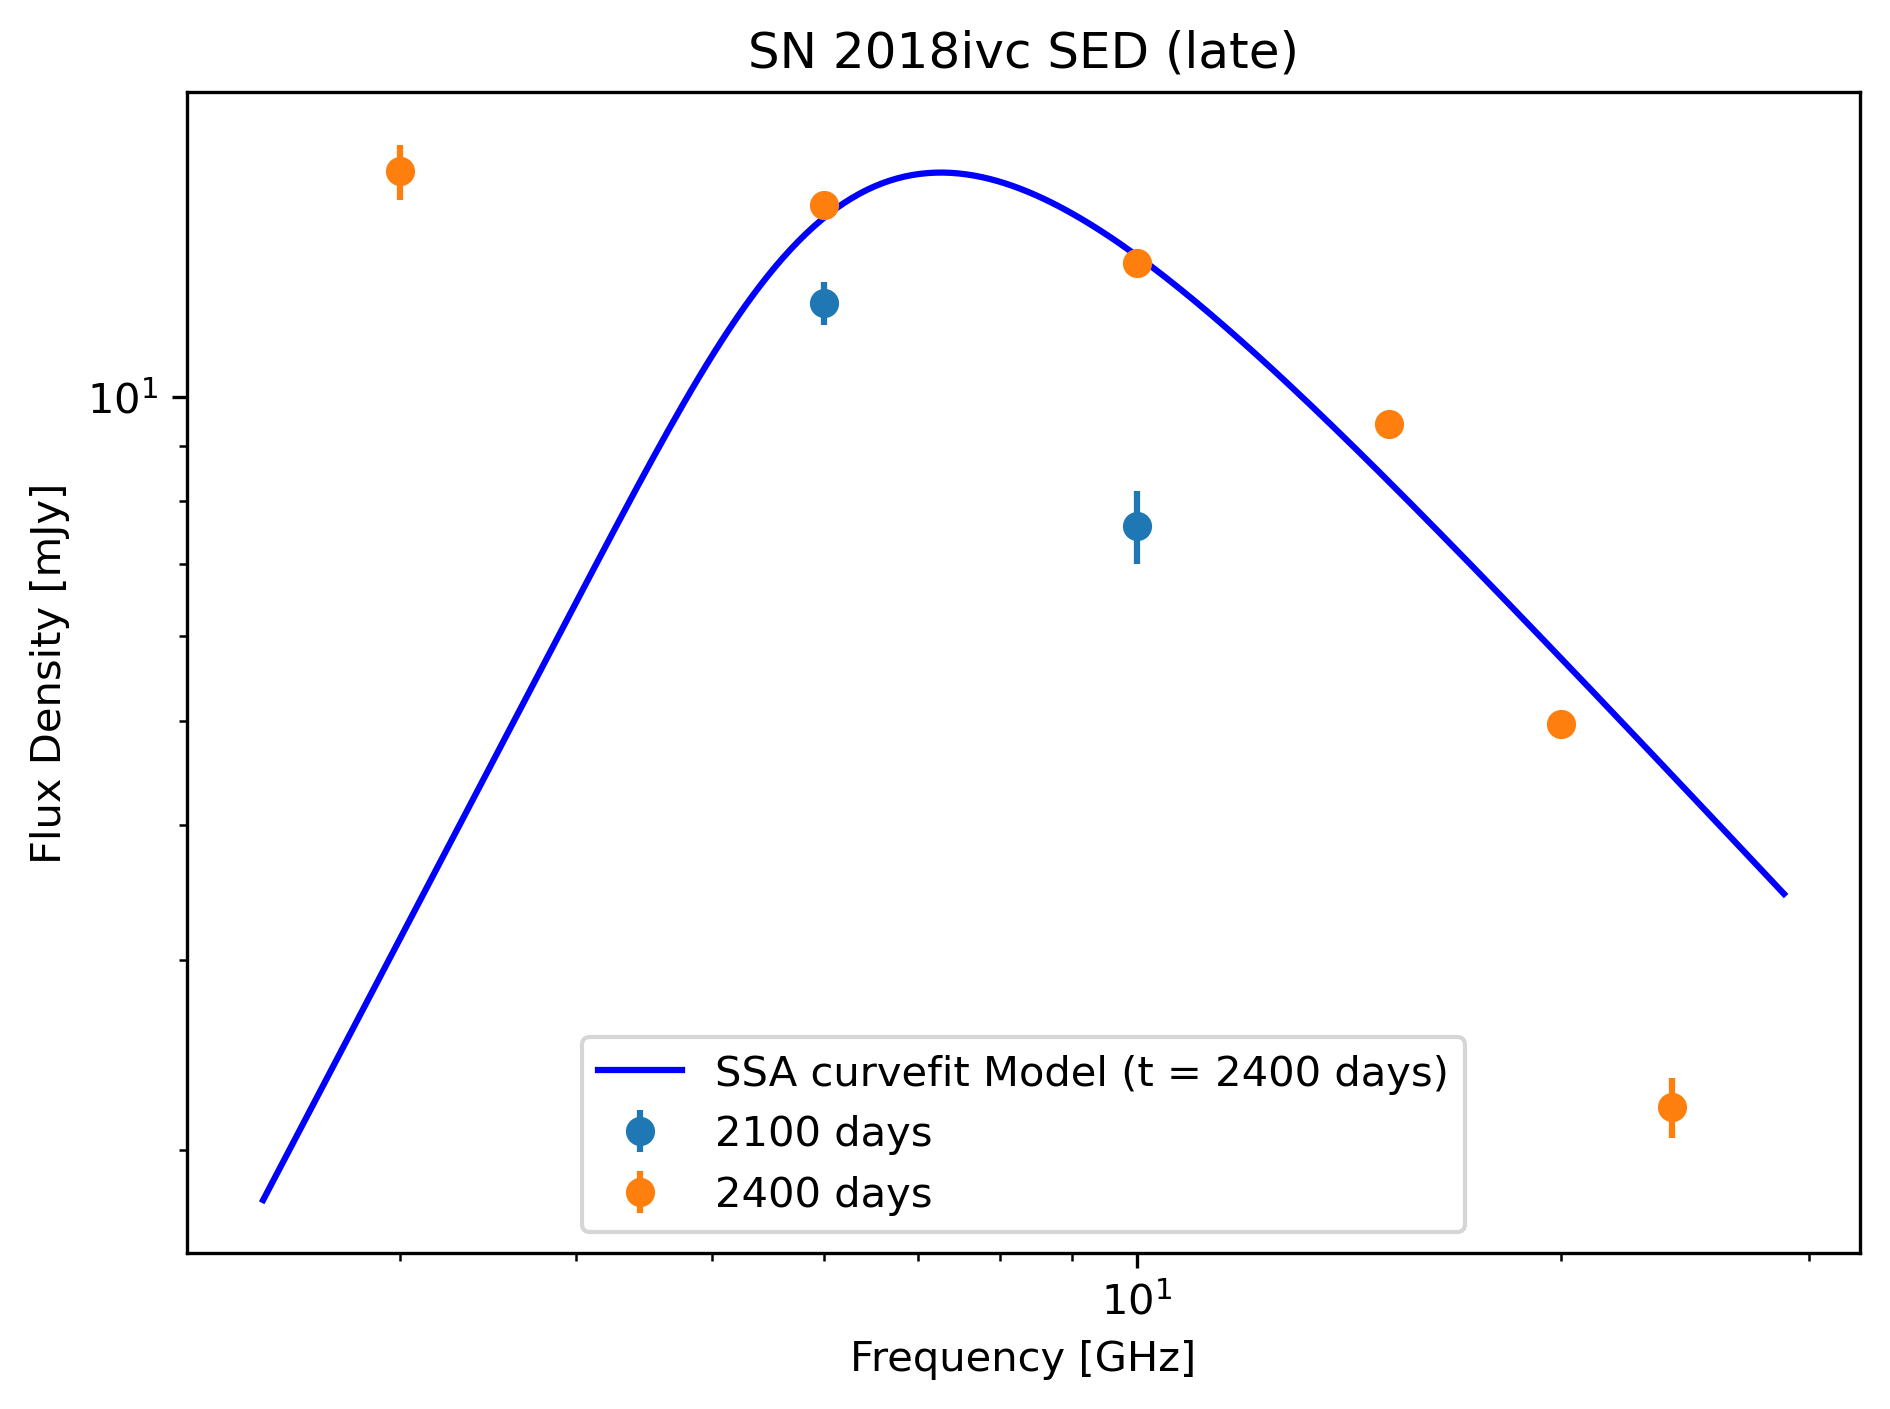

In [17]:
# plot the initial guess SED at a specific epoch
t_plot_late = 2400.0 

# Frequency grid for the model SED 
fmin_late = data_late['freq'].min() * 0.8
fmax_late = data_late['freq'].max() * 1.2
freq_model_late = np.logspace(np.log10(fmin_late), np.log10(fmax_late), 200)

# Evaluate the SSA model using the fitted parameters
flux_model_late = functions.F_SSA_time(freq_model_late, t_plot_late, K1_late, K2_late, p_late, a_late, b_late)

plt.figure(dpi=300)

# Plot the data, color-coded by phase
for phase_val_late in np.unique(data_late['phase']):
    mask_phase_late = data_late['phase'] == phase_val_late
    plt.errorbar(
        data_late['freq'][mask_phase_late],
        data_late['flux'][mask_phase_late],
        yerr=data_late['flux_err'][mask_phase_late],
        fmt='o',
        label=f'{phase_val_late:.0f} days'
    )

# Plot the model SED
plt.plot(freq_model_late, flux_model_late, 'b-', label=f'SSA curvefit Model (t = {t_plot_late:.0f} days)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED (late)')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# use the initial guesses from curve fitting to initialize MCMC (late)
sampler_late = functions.run_mcmc([K1_late, K2_late, p_late, a_late, b_late], data_late, niters=2000, nwalkers=400)
chain_late = sampler_late.chain

/opt/miniconda3/envs/18ivc/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


Computation time: 108.072919 s


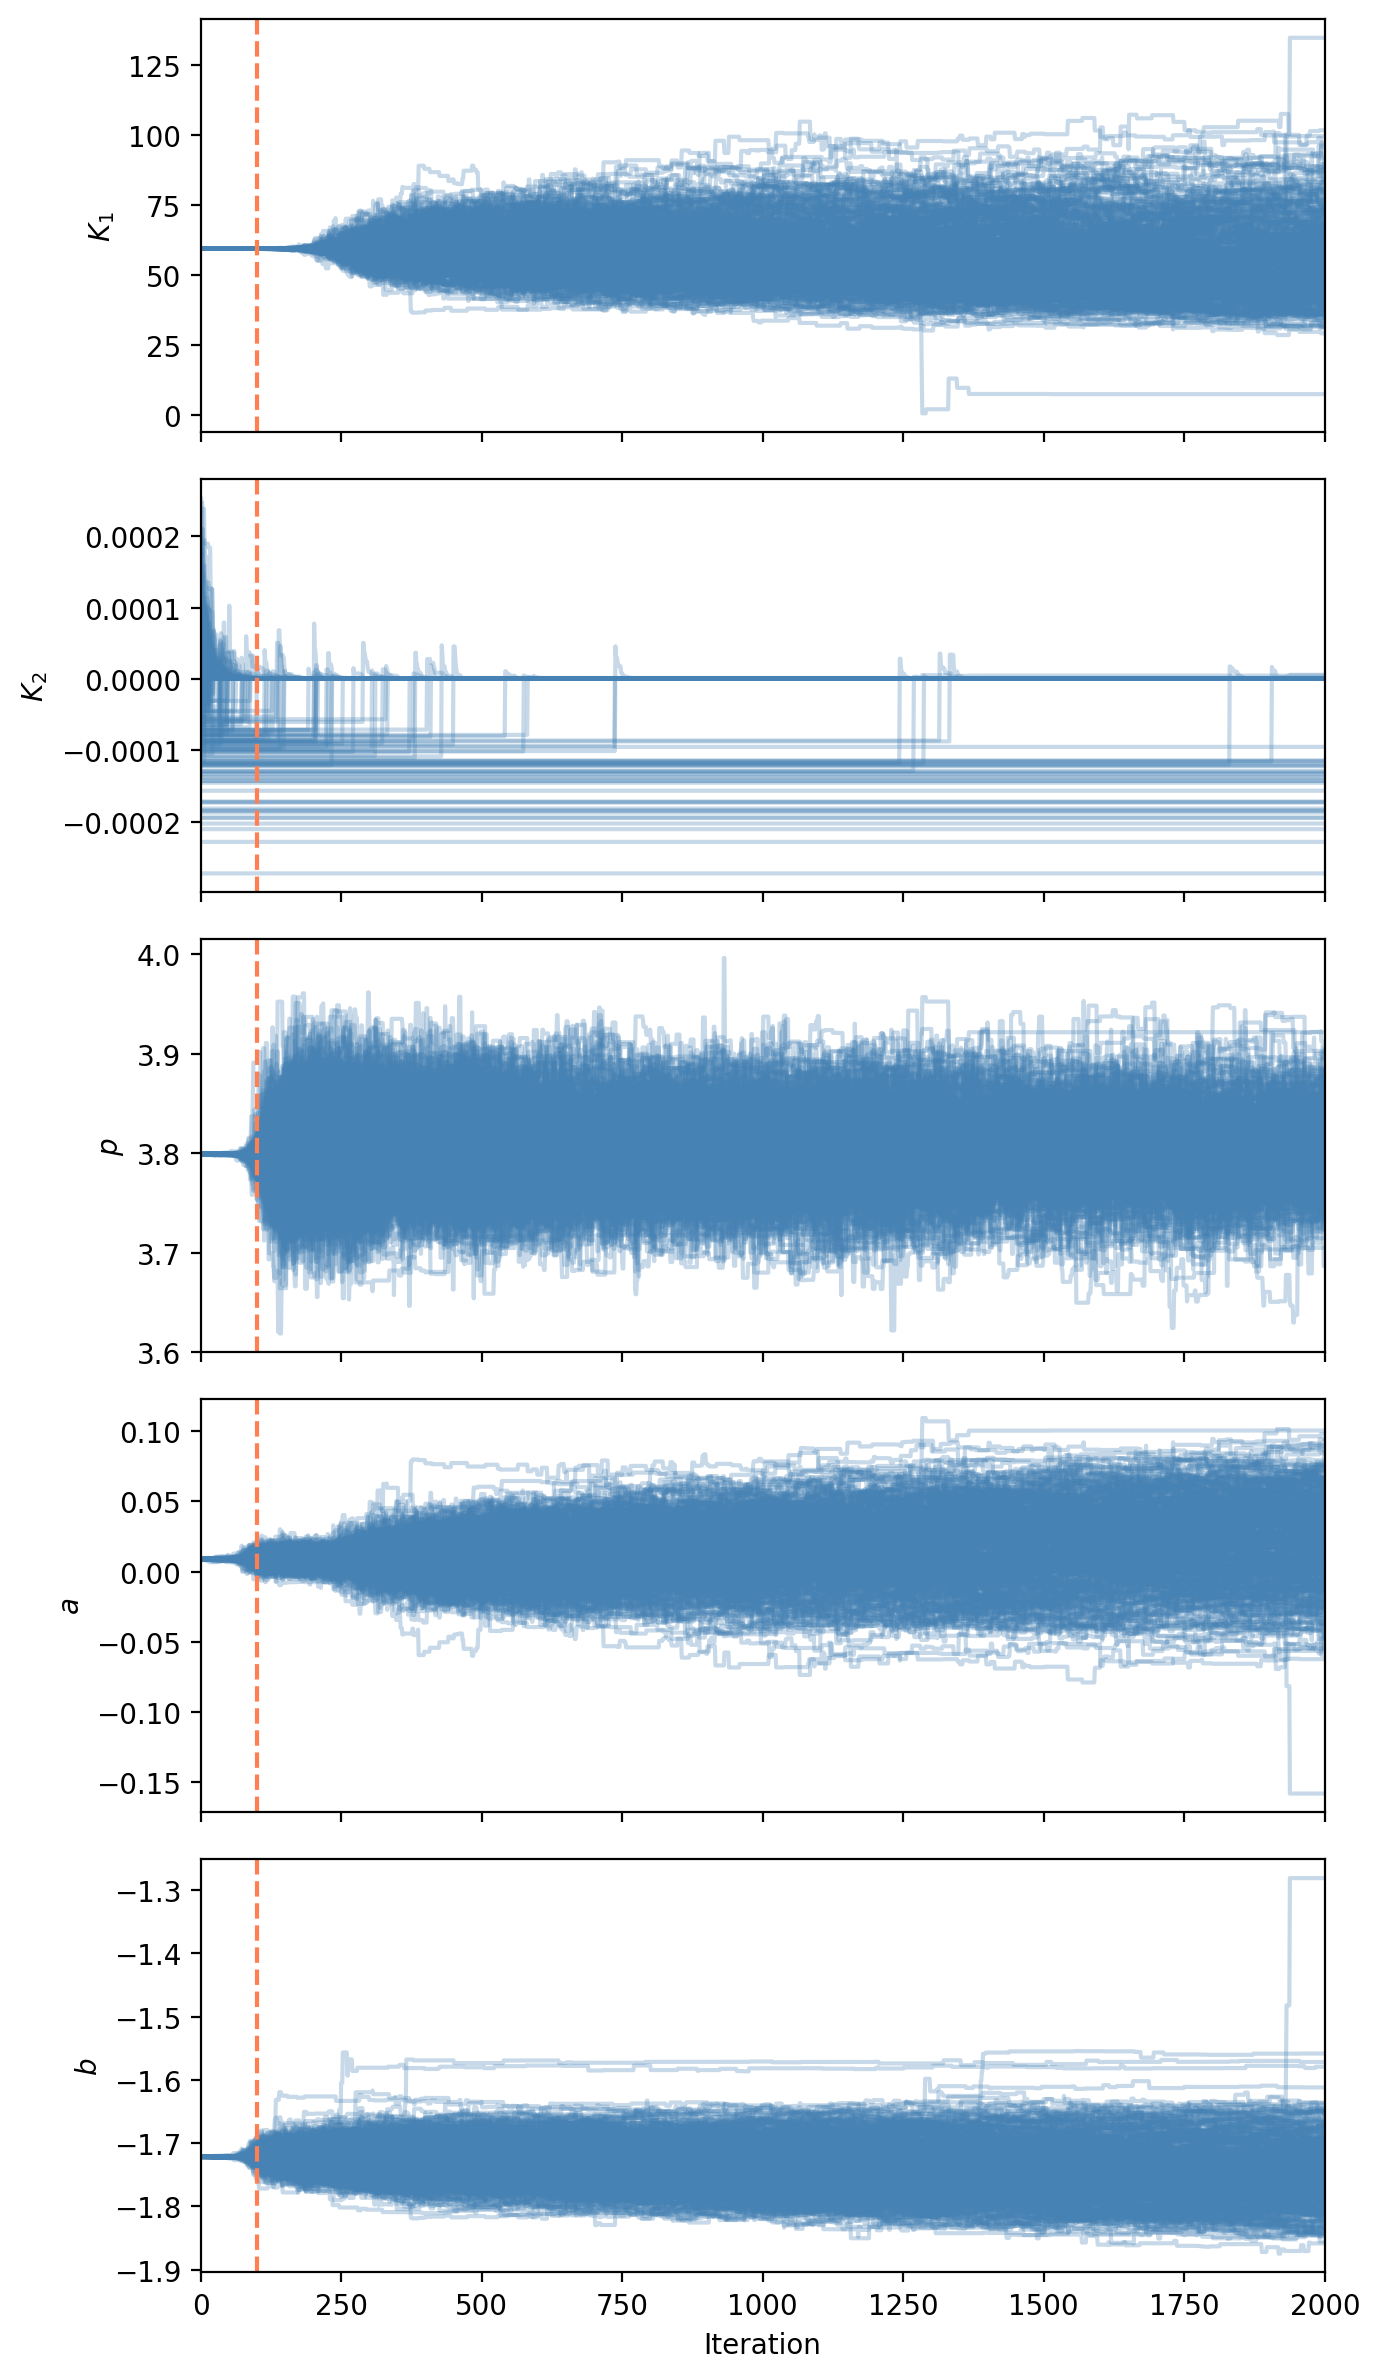

In [19]:
# plot the chains to determine burn in phase
chain_cut_late = 100
functions.make_chain_plot(chain_late, chain_cut_late)

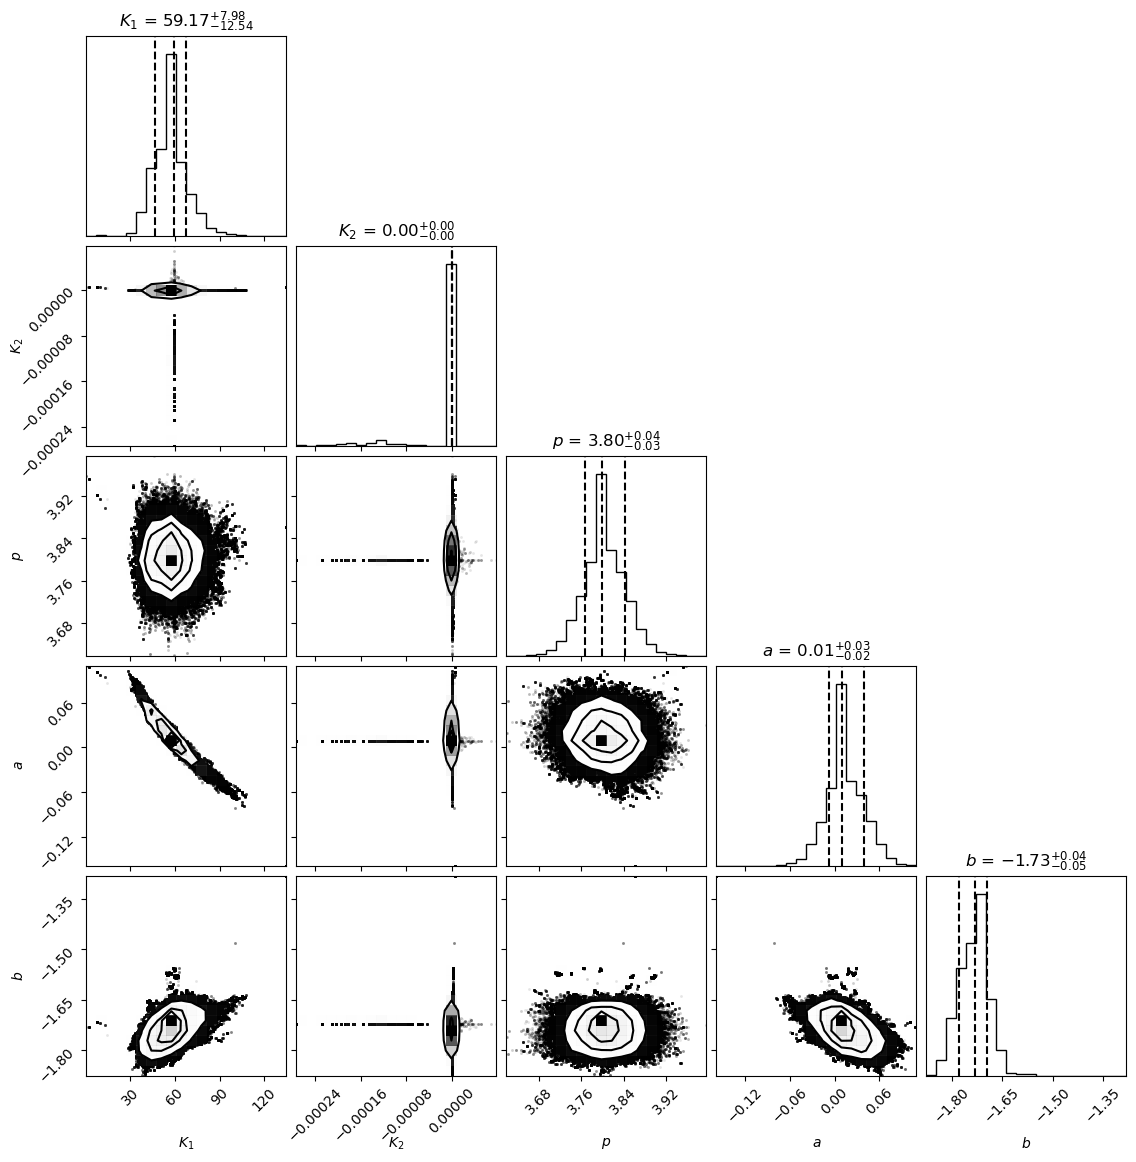

In [20]:
# make corner plots and get the best fit values and uncertainties
good_chain_late = chain_late[:, chain_cut_late:, :]
functions.make_corner_plot(good_chain_late)
best_params_late = functions.get_best_params(good_chain_late)

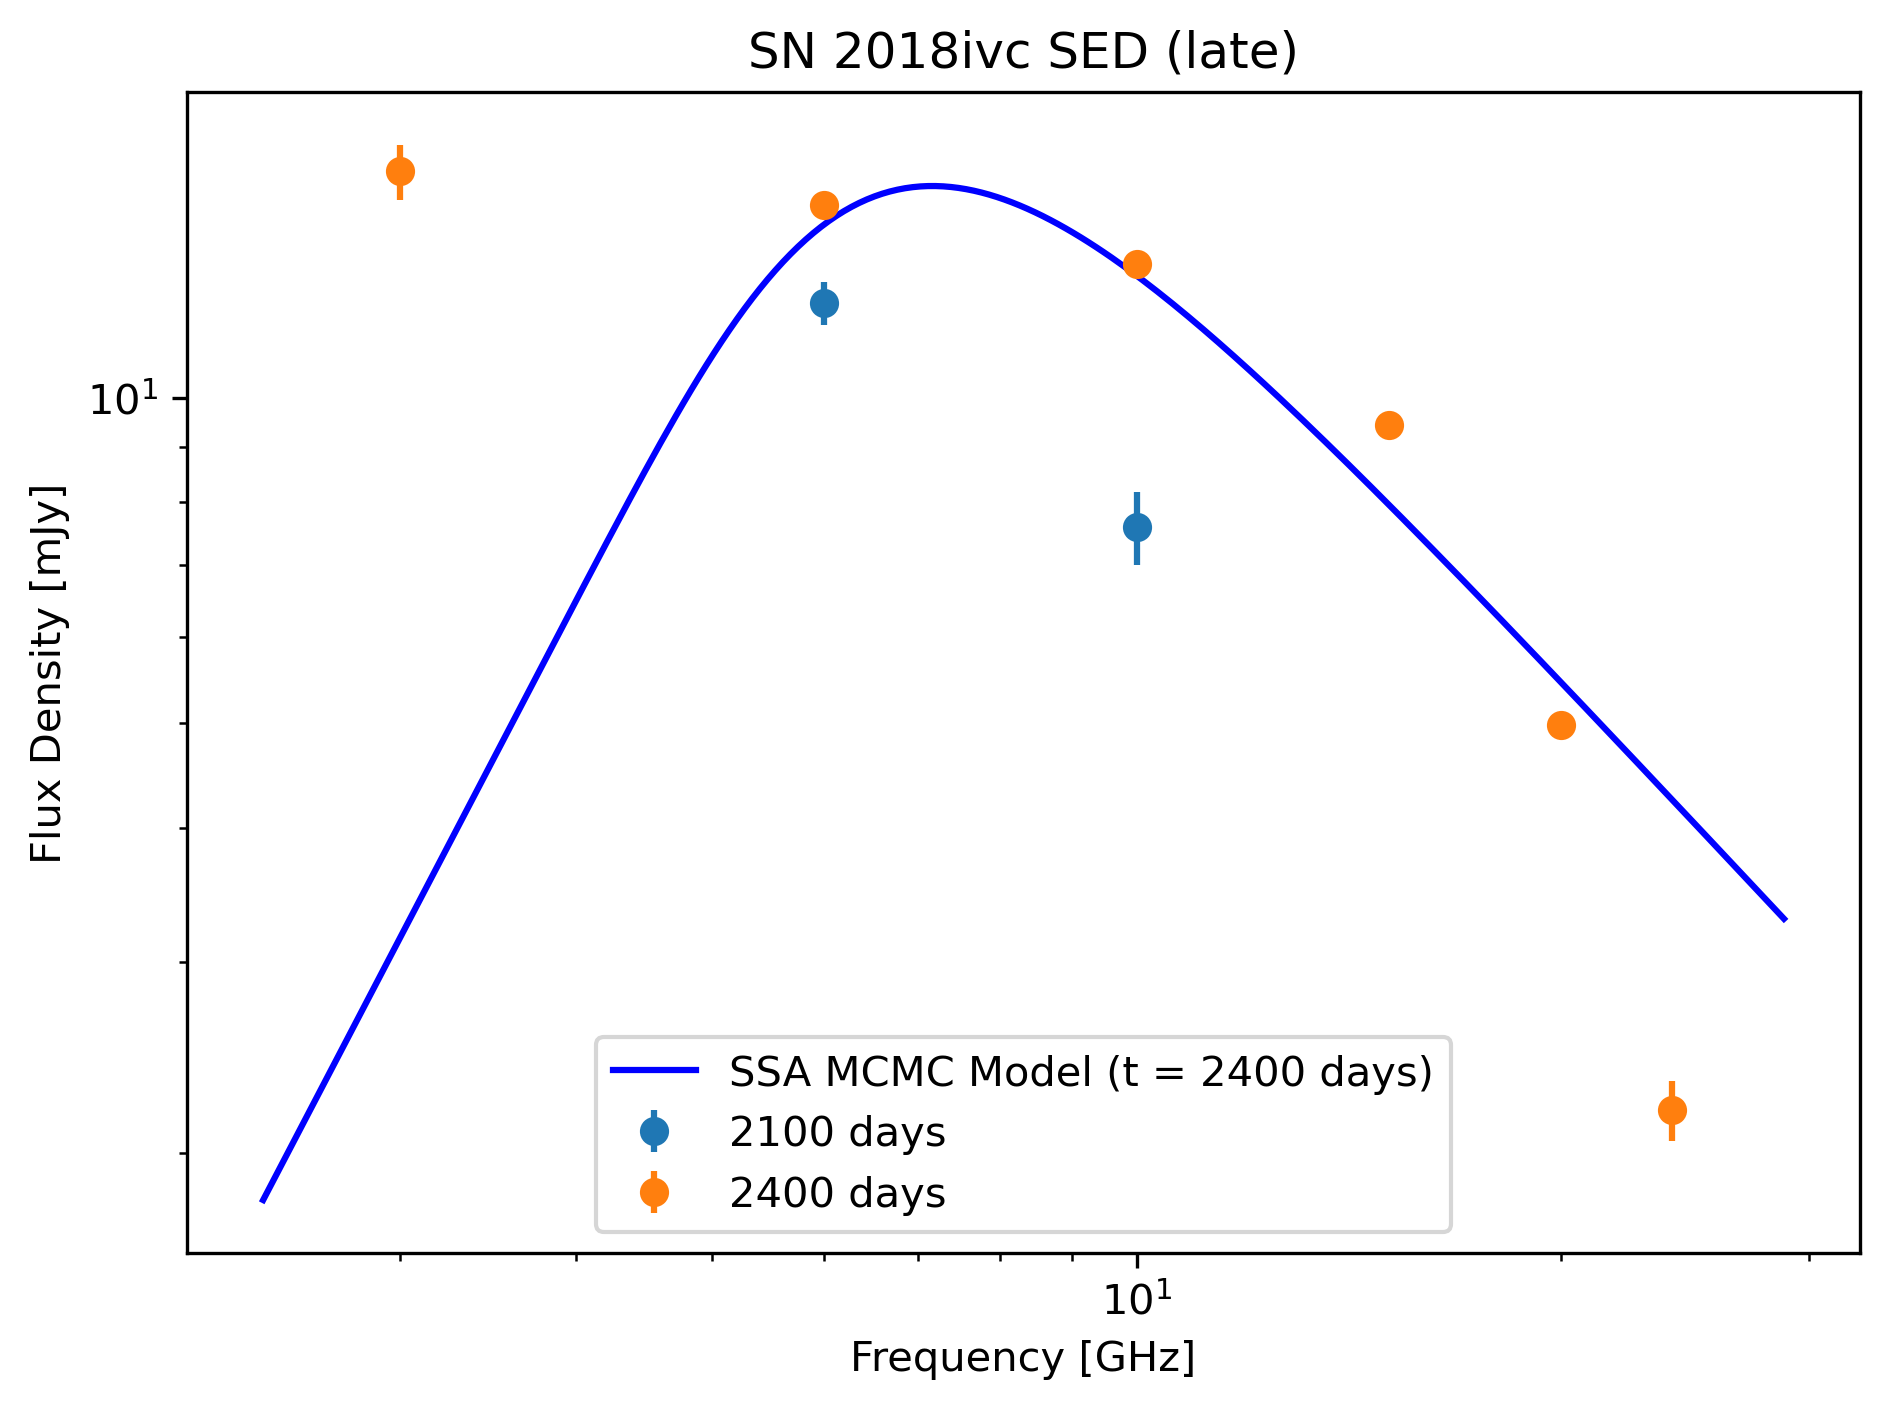

In [21]:
# now plot the MCMC model and data (late)
t_plot_late = 2400.0 

# Frequency grid for the model SED 
fmin_late = data_late['freq'].min() * 0.8
fmax_late = data_late['freq'].max() * 1.2
freq_model_late = np.logspace(np.log10(fmin_late), np.log10(fmax_late), 200)

# unpack best-fit parameters
K1_best_late, K1_err_late, K1_uncertainty_late = best_params_late['$K_1$']
K2_best_late, K2_err_late, K2_uncertainty_late = best_params_late['$K_2$']
p_best_late, p_err_late, p_uncertainty_late = best_params_late['$p$']
a_best_late, a_err_late, a_uncertainty_late = best_params_late['$a$']
b_best_late, b_err_late, b_uncertainty_late = best_params_late['$b$']

# Evaluate the SSA model using the fitted parameters
flux_model_MCMC_late = functions.F_SSA_time(freq_model_late, t_plot_late, K1_best_late, K2_best_late, p_best_late, a_best_late, b_best_late)

plt.figure(dpi=300)

# Plot the data, color-coded by phase
for phase_val_late in np.unique(data_late['phase']):
    mask_phase_late = data_late['phase'] == phase_val_late
    plt.errorbar(
        data_late['freq'][mask_phase_late],
        data_late['flux'][mask_phase_late],
        yerr=data_late['flux_err'][mask_phase_late],
        fmt='o',
        label=f'{phase_val_late:.0f} days'
    )

# Plot the model SED
plt.plot(freq_model_late, flux_model_MCMC_late, 'b-', label=f'SSA MCMC Model (t = {t_plot_late:.0f} days)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED (late)')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 
Place to generate plots to share in group meeting, presentations, for the paper, etc.

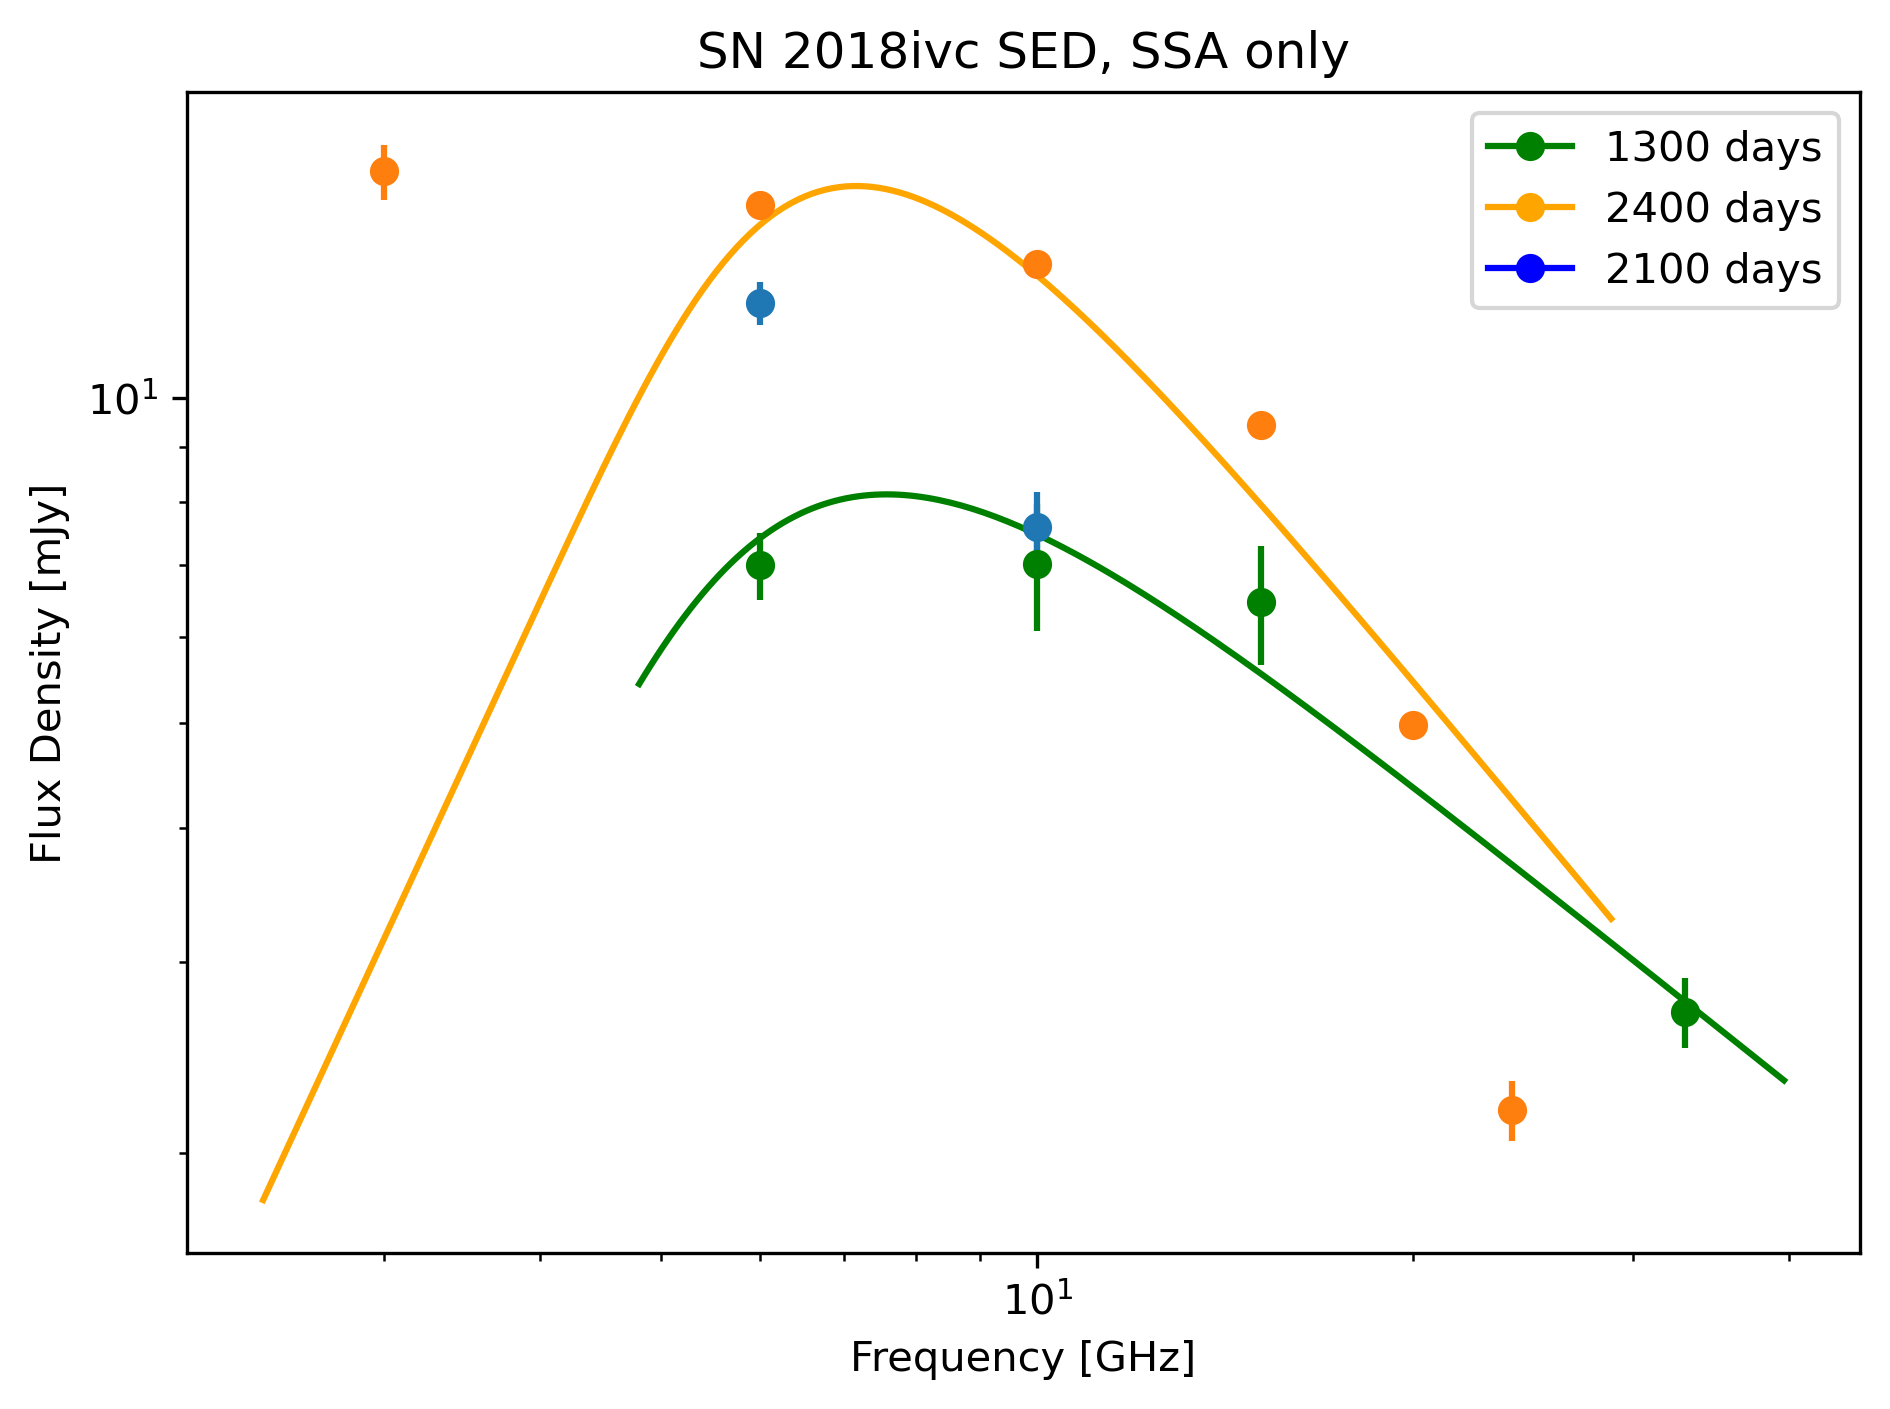

In [30]:
# Overplot early and late data along with their MCMC models
plt.figure(dpi=300)

# Plot early and late data
plt.errorbar(data_early['freq'],data_early['flux'],yerr=data_early['flux_err'],
             fmt='o',color='green',label='_nolegend_')

# plt.errorbar(data_late['freq'],data_late['flux'],yerr=data_late['flux_err'],
#              fmt='o',color='magenta',label='_nolegend_')

# Plot the data, color-coded by phase
for phase_val_late in np.unique(data_late['phase']):
    mask_phase_late = data_late['phase'] == phase_val_late
    plt.errorbar(
        data_late['freq'][mask_phase_late],
        data_late['flux'][mask_phase_late],
        yerr=data_late['flux_err'][mask_phase_late],
        fmt='o',
        label=f'_nolegend_'
    )

# Plot early and late SSA models
plt.plot(freq_model_early,flux_model_MCMC_early,'g-',label='_nolegend_')
plt.plot(freq_model_late,flux_model_MCMC_late,color='orange',linestyle='-',label='_nolegend_')

# Make combine legends
early_handle = mlines.Line2D(
    [], [], color='green', marker='o', linestyle='-',
    label='1300 days'
)

late_handle = mlines.Line2D(
    [], [], color='orange', marker='o', linestyle='-',
    label='2400 days'
)

handle_2100 = mlines.Line2D(
    [], [], color='blue', marker='o',
    label='2100 days'
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [mJy]')
plt.title('SN 2018ivc SED, SSA only')

# Use only the proxy handles in the legend
plt.legend(handles=[early_handle, late_handle, handle_2100])

plt.tight_layout()
plt.show()


# Scratchwork
Everything from this point and below

In [4]:
# get inital guesses from running curve_fit on a subset of the data
data_init = data[((data['phase'] < 1700) & (data['flux'] > 0))]

initial_guess = [100.0, 0.1, 2.5, 0.0, 0.0]
bounds = (
    [0.0,   0.0,  1.0, -10.0, -10.0],   # lower bounds
    [np.inf, np.inf, 4.0,  10.0,  10.0] # upper bounds
)

results = functions.calc_params(data_init, functions.F_SSA_time, initial_guess, bounds)


K1 = results['K1'][0]
K2 = results['K2'][0]
p  = results['p'][0]
a  = results['a'][0]
b  = results['b'][0]

In [8]:
# run MCMC with a uniform prior, only on the non-zero data 
data_nonzero = data[data['flux'] > 0]

sampler = functions.run_mcmc([K1, K2, p, a, b], data_nonzero, niters=20000, nwalkers=400)
chain = sampler.chain

Computation time: 965.355784 s


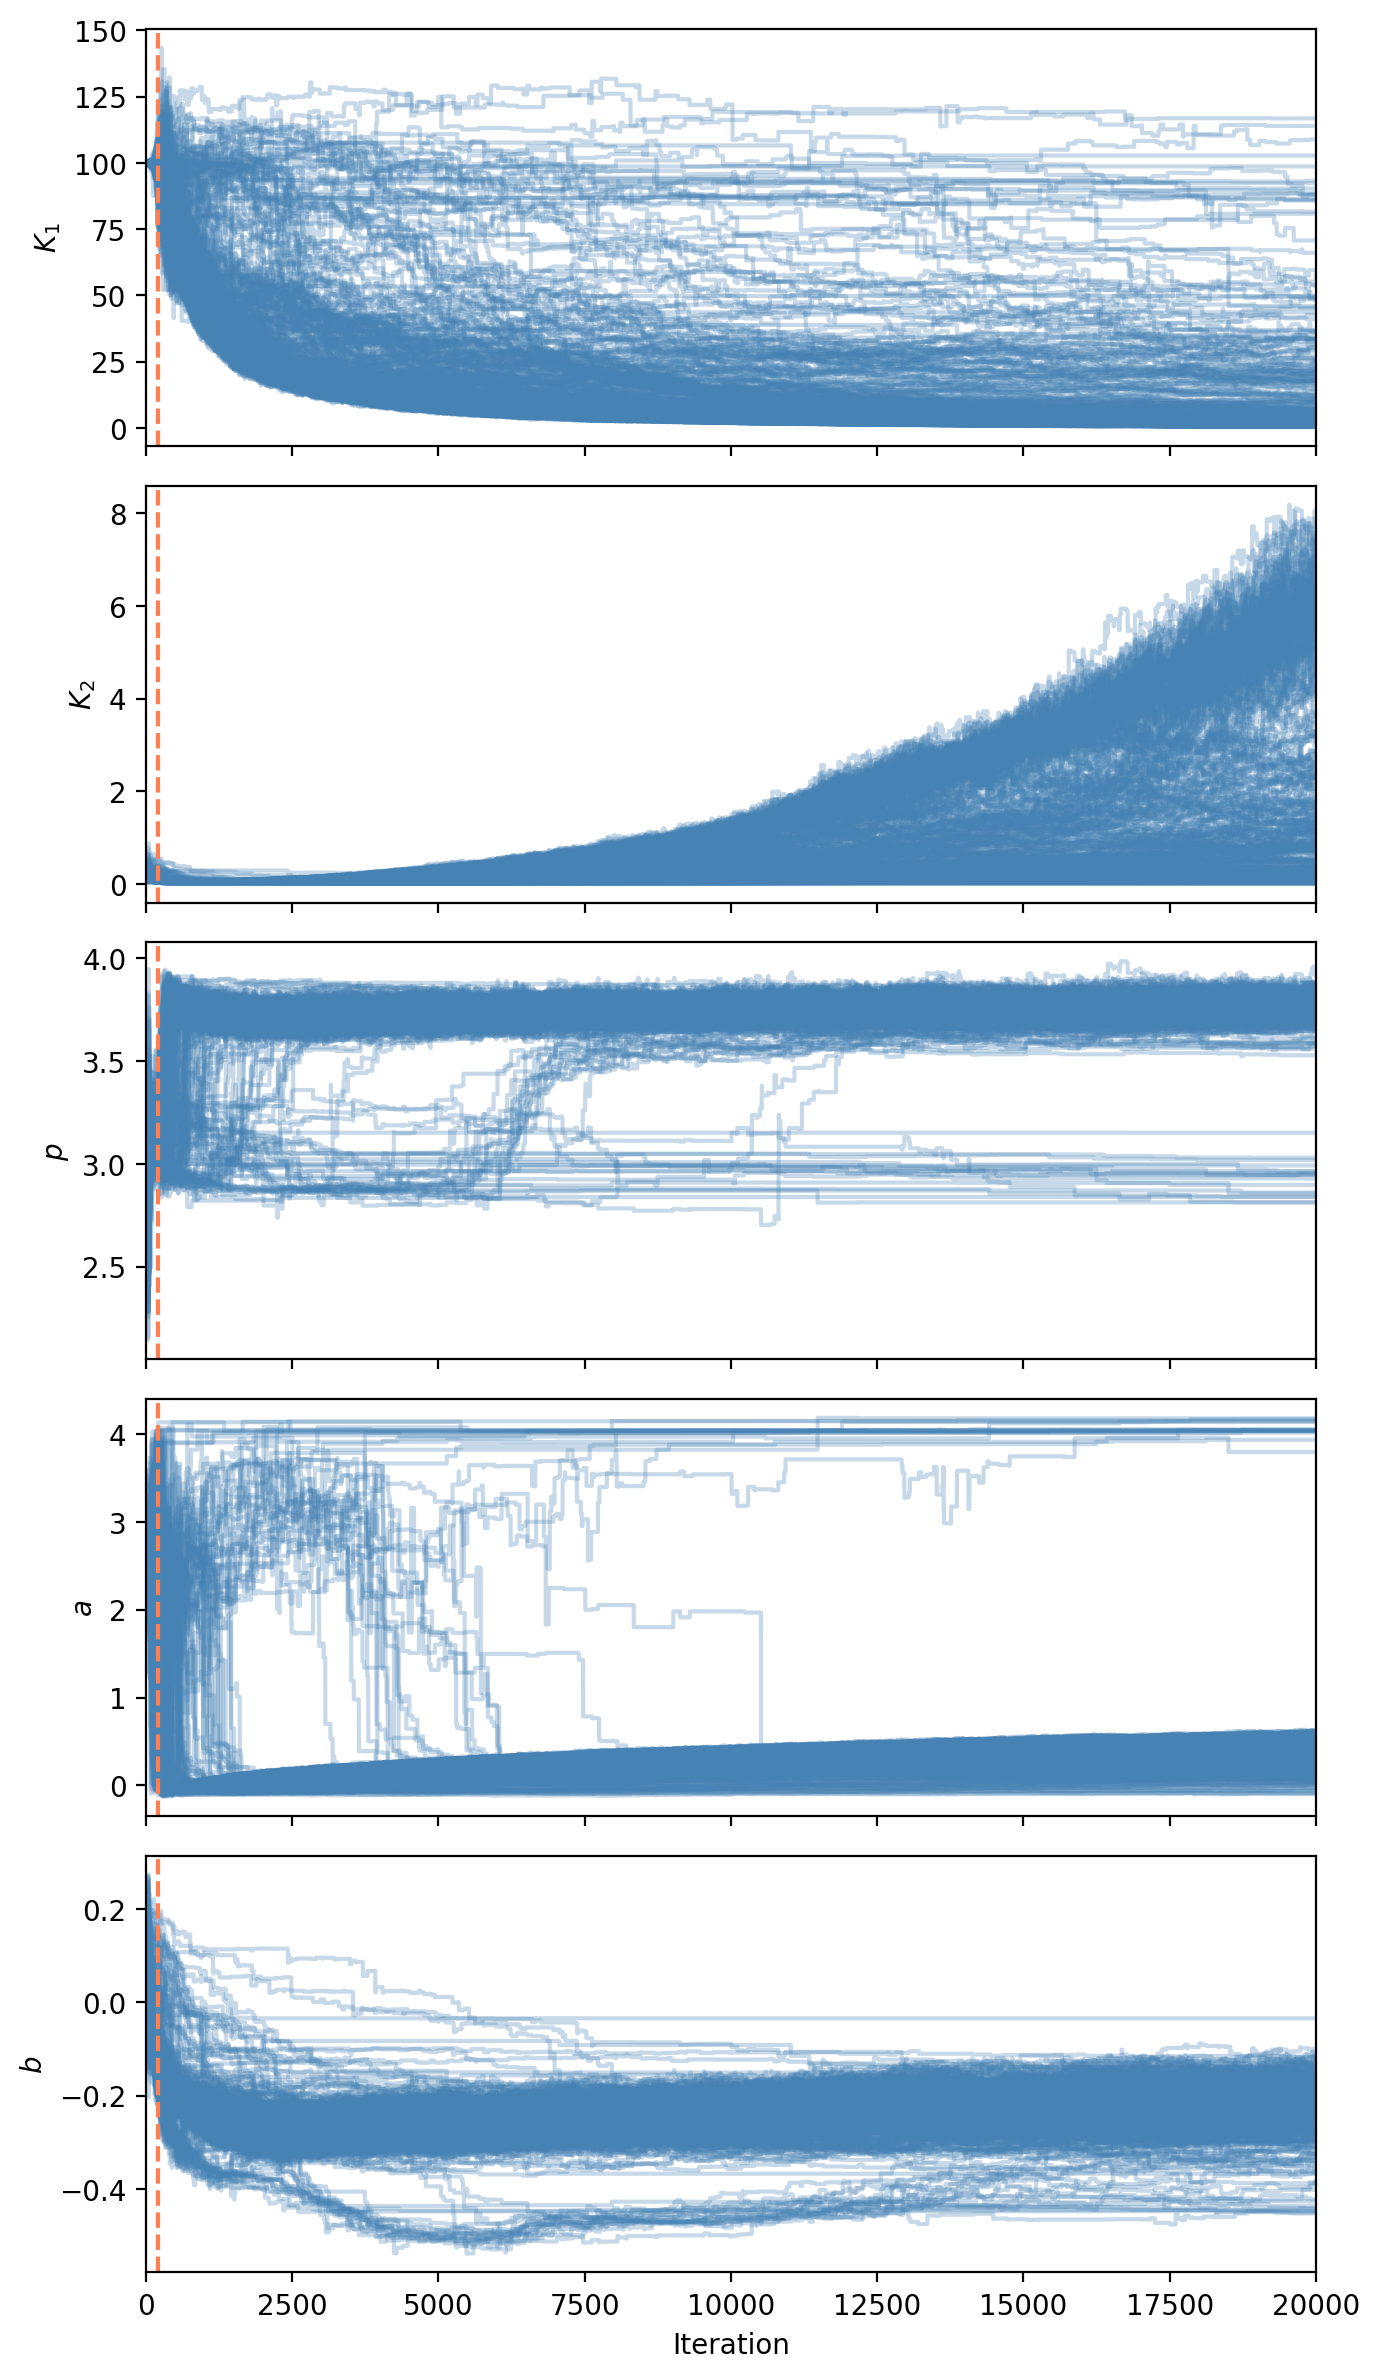

In [9]:
# plot the chains to determine burn in phase
chain_cut = 200
functions.make_chain_plot(chain, chain_cut)

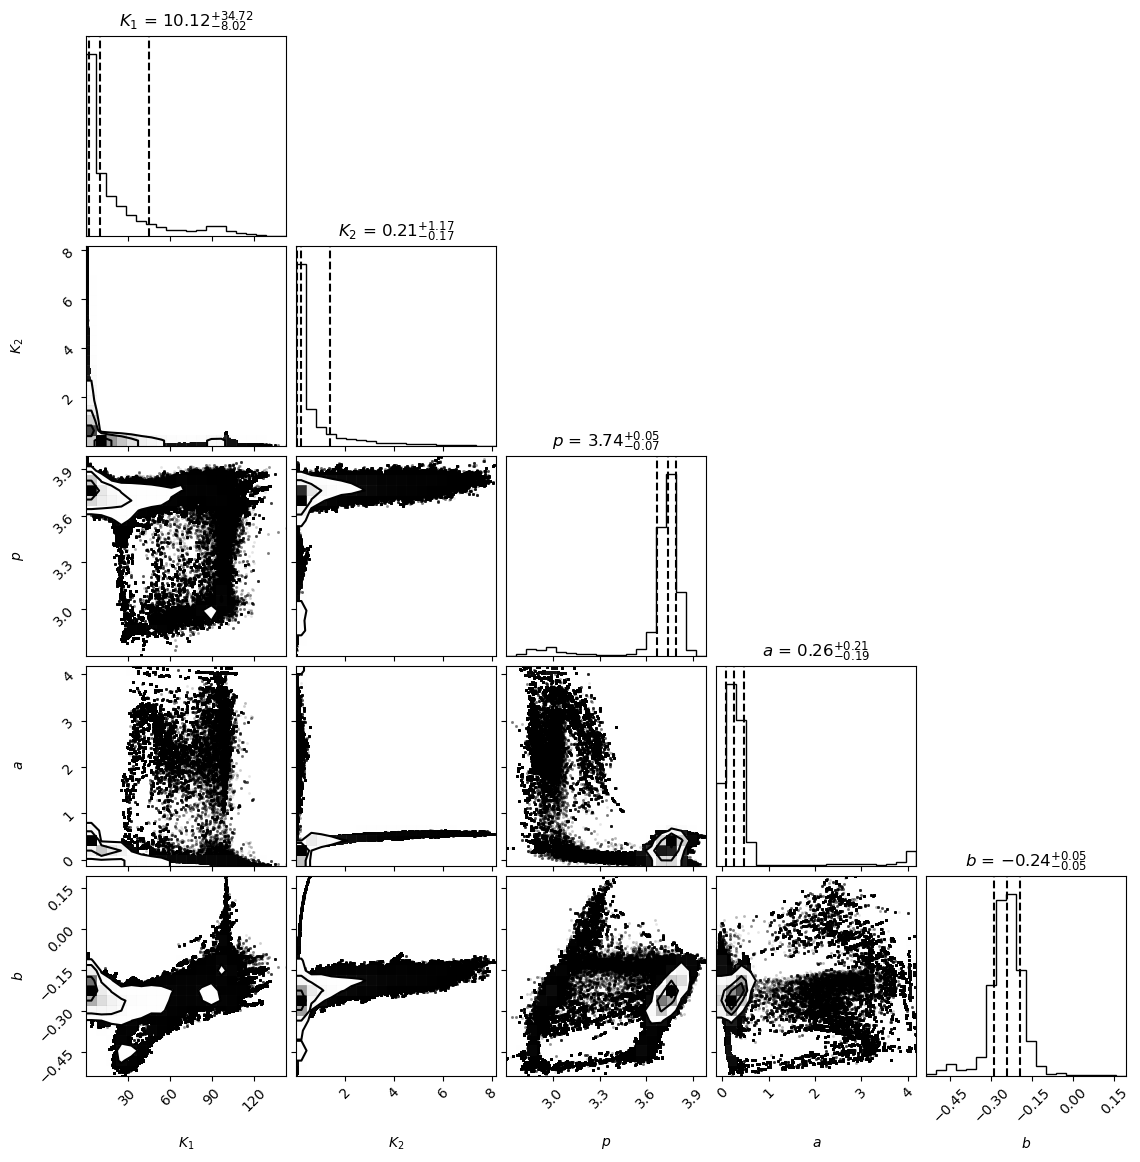

In [10]:
# make corner plots and get the best fit values and uncertainties
good_chain = chain[:, chain_cut:, :]
functions.make_corner_plot(good_chain)
best_params = functions.get_best_params(good_chain)